In [1]:
import pandas as pd
# import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point
from shapely import wkt
from tqdm import tqdm
import pandas as pd
import math
from tqdm import tqdm
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# df = pd.read_csv("Data/VED_DynamicData_Part1/VED_171101_week.csv")
# df = pd.read_csv("Data/VED_DynamicData_Part1/VED_171108_week.csv")
# df = pd.read_csv("Data/VED_DynamicData_Part1/VED_171115_week.csv")
#df = pd.read_csv("Data/VED_DynamicData_Part1/VED_171122_week.csv")
# df = pd.read_csv("Data/VED_DynamicData_Part1/VED_171129_week.csv")
df = pd.read_csv("eVED/eVED_171101_week.csv")




df.shape

/var/folders/vw/n652jyrx33bdgylnnf_wqqh40000gn/T/ipykernel_4598/3344130152.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("eVED/eVED_171101_week.csv")


(489414, 35)

In [20]:
df

,DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,Energy_Consumption,Matchted Latitude[deg],Matched Longitude[deg],Match Type,Class of Speed Limit,Speed Limit[km/h],Speed Limit with Direction[km/h],Intersection,Bus Stops,Focus Points
0,1.586651,8.0,706.0,0.0,42.277558,-83.698750,40.0,22.129999,2285.0,49.019608,...,NaN,42.277558,-83.698767,0,0.0,56,56.0,NaN,NaN,NaN
1,1.586651,8.0,706.0,200.0,42.277558,-83.698750,40.0,22.129999,2285.0,67.450981,...,NaN,42.277558,-83.698767,1,0.0,56,56.0,NaN,NaN,NaN
2,1.586651,8.0,706.0,1100.0,42.277558,-83.698750,45.0,22.129999,2285.0,67.450981,...,NaN,42.277558,-83.698767,1,0.0,56,56.0,NaN,NaN,NaN
3,1.586651,8.0,706.0,2100.0,42.277558,-83.698750,47.0,6.150000,2744.0,67.450981,...,NaN,42.277558,-83.698767,1,0.0,56,56.0,NaN,NaN,NaN
4,1.586651,8.0,706.0,4200.0,42.277558,-83.698750,48.0,21.440001,1982.0,67.450981,...,NaN,42.277558,-83.698767,1,0.0,56,56.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489409,7.992231,601.0,128.0,896900.0,42.288847,-83.753957,12.0,24.150000,2042.0,18.431374,...,0.002605,42.288845,-83.754099,1,1.0,40,40.0,NaN,NaN,NaN
489410,7.992231,601.0,128.0,897100.0,42.288847,-83.753957,18.0,24.150000,2042.0,18.431374,...,0.003907,42.288845,-83.754099,1,1.0,40,40.0,NaN,NaN,NaN
489411,7.992231,601.0,128.0,897900.0,42.288847,-83.753957,18.0,30.350000,2152.0,18.431374,...,0.004910,42.288845,-83.754099,1,1.0,40,40.0,NaN,NaN,NaN
489412,7.992231,601.0,128.0,898100.0,42.288847,-83.753957,24.0,30.350000,2152.0,18.431374,...,0.006547,42.288845,-83.754099,1,1.0,40,40.0,NaN,NaN,NaN


In [21]:
df.isnull().sum()

DayNum                                   0
VehId                                    0
Trip                                     0
Timestamp(ms)                            0
Latitude[deg]                            0
Longitude[deg]                           0
Vehicle Speed[km/h]                    757
MAF[g/sec]                           86034
Engine RPM[RPM]                        757
Absolute Load[%]                    126149
OAT[DegC]                           434245
Fuel Rate[L/hr]                     469708
Air Conditioning Power[kW]          469708
Air Conditioning Power[Watts]       450318
Heater Power[Watts]                 485781
HV Battery Current[A]               434245
HV Battery SOC[%]                   434245
HV Battery Voltage[V]               434245
Short Term Fuel Trim Bank 1[%]      414151
Short Term Fuel Trim Bank 2[%]      462814
Long Term Fuel Trim Bank 1[%]       414151
Long Term Fuel Trim Bank 2[%]       462814
Elevation Raw[m]                         0
Elevation S

In [ ]:
# Define start and end dates based on the pattern - Change as needed
n = 0
start_date = datetime.strptime("171101", "%y%m%d")
#end_date = datetime.strptime("180328", "%y%m%d")

# n = 22
# start_date = datetime.strptime("180404", "%y%m%d")
end_date = datetime.strptime("181107", "%y%m%d")

# Generate list of dates at weekly intervals
current_date = start_date
date_list = []
while current_date <= end_date:
    date_list.append(current_date.strftime("%y%m%d"))
    current_date += timedelta(days=7)

# Loop through the files

for date_str in date_list:
    #file_path = f"Data/VED_DynamicData_Part1/VED_{date_str}_week.csv"
    file_path = f"eVED/eVED_{date_str}_week.csv"

    df = pd.read_csv(file_path)
    n = n + 1
    # Process df as needed
    print(f'Working on {n}th sample')
    print(f"Processed file: {file_path}")
    print(df.shape)
    
    # Fill with Linear interpolation
    df['MAF[g/sec]'] = (
        df.groupby('Trip')['MAF[g/sec]']
        .transform(lambda s: s.interpolate(method='linear', limit_direction='both'))
    )
    # The rest is filled with minimum value of each group
    df['MAF[g/sec]'] = df.groupby('Trip')['MAF[g/sec]'].transform(
        lambda s: s.fillna(s.min(), limit=1)
    )
    # If Vehicle Speed is 0, then MAF is also 0
    df.loc[df['Vehicle Speed[km/h]'] == 0, 'MAF[g/sec]'] = 0
    # Then finally fill with minimum value
    df['MAF[g/sec]'] = df['MAF[g/sec]'].transform(lambda x: x.fillna(x.min()))

    # Apply the function
    df = fill_fuel_rate_eved(df)

    # Fill with Linear interpolation
    df['Vehicle Speed[km/h]'] = (
        df.groupby('Trip')['Vehicle Speed[km/h]']
        .transform(lambda s: s.interpolate(method='linear', limit_direction='both'))
    )
    # The rest is filled with minimum value of each group
    df['Vehicle Speed[km/h]'] = df.groupby('Trip')['Vehicle Speed[km/h]'].transform(
        lambda s: s.fillna(s.min(), limit=1)
    )
    # Then finally fill the rest with 0
    df['Vehicle Speed[km/h]'] = df['Vehicle Speed[km/h]'].fillna(0)

    # If the Vehicle Speed[km/h] is 0, then the Engine RPM[RPM] is also 0
    df.loc[df['Vehicle Speed[km/h]'] == 0, 'Engine RPM[RPM]'] = 0
    # Apply Linear interpolation for Engine RPM
    df['Engine RPM[RPM]'] = (
        df.groupby('Trip')['Engine RPM[RPM]']
        .transform(lambda s: s.interpolate(method='linear', limit_direction='both'))
        .fillna(method='ffill')
        .fillna(method='bfill')
    )

    # Fill with Linear interpolation
    df['OAT[DegC]'] = (
        df.groupby('Trip')['OAT[DegC]']
        .transform(lambda s: s.interpolate(method='linear', limit_direction='both'))
        .fillna(method='ffill')
        .fillna(method='bfill')
    )

    # If the Vehicle Speed[km/h] is 0, then the Absolute Load[%] is also 0
    df.loc[df['Vehicle Speed[km/h]'] == 0, 'Absolute Load[%]'] = 0
    # Apply Linear interpolation for Absolute Load[%]
    df['Absolute Load[%]'] = (
        df.groupby('Trip')['Absolute Load[%]']
        .transform(lambda s: s.interpolate(method='linear', limit_direction='both'))
        .fillna(method='ffill')
        .fillna(method='bfill')
    )

    # Fill Speed Limit[km/h] Nan with 0
    df['Speed Limit[km/h]'] = df['Speed Limit[km/h]'].fillna(0)
    # Fill Speed Limit with Direction[km/h]  Nan with 0
    df['Speed Limit with Direction[km/h]'] = df['Speed Limit with Direction[km/h]'].fillna(0)
    # Apply the function to parse speed values
    df['Speed Limit[km/h]'] = df['Speed Limit[km/h]'].apply(parse_speed)
    df['Speed Limit with Direction[km/h]'] = df['Speed Limit with Direction[km/h]'].apply(parse_speed)

    # Fill Intersection Nan with 0
    df['Intersection'] = df['Intersection'].fillna(0)
    # Fill Bus Stops Nan with 0
    df['Bus Stops'] = df['Bus Stops'].fillna(0)

    print(df.isnull().sum())

    df = groupdata(df)
    print(df.shape)


    # Save gdf data
    df.to_csv(f"sampled_{n}.csv", index=False)

In [22]:
df = pd.read_csv("final_veh.csv")
df

,VehId,Trip,Distance_km,Duration,HourOfDay,Weekday,Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,Speed Limit[km/h],Speed Limit with Direction[km/h],Intersection,Bus Stops,Elevation Raw[m],Elevation Smoothed[m],fuel_consump,Vehicle Type,Engine Configuration & Displacement,Generalized_Weight
0,8.0,706.0,2.058716,0.037306,14.066667,3,51.080292,26.510000,2744.000000,35.128095,...,64.0,64.0,0.0,0.0,243.897461,243.897461,0.109223,ICE,4-FI 1.5L,2500.000000
1,8.0,707.0,2.887493,0.066528,22.350000,3,43.154122,32.889999,2714.000000,35.617402,...,72.0,72.0,0.0,0.0,239.611048,239.611048,0.224303,ICE,4-FI 1.5L,2500.000000
2,8.0,708.0,5.167273,0.115389,13.850000,4,43.941884,33.040001,2623.000000,36.417934,...,64.0,64.0,10.0,8.0,247.865271,247.865271,0.376347,ICE,4-FI 1.5L,2500.000000
3,10.0,1558.0,0.760192,0.029500,17.266667,3,35.550077,0.000000,0.000000,0.000000,...,48.0,48.0,22.0,7.0,258.008593,258.008593,0.000000,EV,ELECTRIC,3500.000000
4,10.0,1561.0,2.421239,0.127889,21.450000,4,22.925093,23.070000,2206.117647,0.804876,...,56.0,56.0,15.0,9.0,251.355141,251.355141,0.879504,EV,ELECTRIC,3500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32547,602.0,162.0,9.199370,0.236639,18.666667,2,41.999123,58.509998,2325.000000,0.000000,...,72.0,72.0,51.0,36.0,263.959211,263.959211,1.238953,ICE,V6 4.0L,3552.419355
32548,605.0,246.0,2.703522,0.054250,22.150000,5,51.849057,39.049999,3150.000000,30.573437,...,72.0,72.0,4.0,0.0,261.547550,261.547550,0.257693,HEV,4-GAS/ELECTRIC 2.3L,4000.000000
32549,609.0,155.0,7.280410,0.234306,19.183333,6,36.532895,56.090000,2472.000000,0.000000,...,72.0,72.0,93.0,50.0,260.602727,260.602727,0.934346,ICE,V6 3.8L,3552.419355
32550,609.0,157.0,3.709523,0.069944,20.033333,6,51.032738,40.480000,2220.000000,0.000000,...,72.0,72.0,15.0,22.0,269.577075,269.577302,0.310041,ICE,V6 3.8L,3552.419355


# Handle missing values

In [13]:
df.isna().sum()

DayNum                                   0
VehId                                    0
Trip                                     0
Timestamp(ms)                            0
Latitude[deg]                            0
Longitude[deg]                           0
Vehicle Speed[km/h]                    757
MAF[g/sec]                           89667
Engine RPM[RPM]                       4390
Absolute Load[%]                    129782
OAT[DegC]                           434245
Fuel Rate[L/hr]                     379955
Air Conditioning Power[kW]          473341
Air Conditioning Power[Watts]       450318
Heater Power[Watts]                 485781
HV Battery Current[A]               434245
HV Battery SOC[%]                   434245
HV Battery Voltage[V]               434245
Short Term Fuel Trim Bank 1[%]      417784
Short Term Fuel Trim Bank 2[%]      466447
Long Term Fuel Trim Bank 1[%]       417784
Long Term Fuel Trim Bank 2[%]       466447
Elevation Raw[m]                         0
Elevation S

In [12]:
# If Fuel_rate is nan, fill it with energy consumption
df['Fuel Rate[L/hr]'] = df['Fuel Rate[L/hr]'].fillna(df['Energy_Consumption'])

In [2]:
def fill_fuel_rate_eved(df,
                        maf_col='MAF[g/sec]',
                        fuel_col='Fuel Rate[L/hr]',
                        stft_cols=('Short Term Fuel Trim Bank 1[%]',
                                   'Short Term Fuel Trim Bank 2[%]'),
                        ltft_cols=('Long Term Fuel Trim Bank 1[%]',
                                   'Long Term Fuel Trim Bank 2[%]'),
                        afr=14.7,
                        fuel_density_g_per_l=740.0):
    """
    Fill missing Fuel Rate[L/hr] in the eVED DataFrame using Algorithm 1.

    Parameters
    ----------
    df : pandas.DataFrame
        Your loaded eVED DataFrame.
    maf_col : str
        Name of the MAF column in g/sec.
    fuel_col : str
        Name of the fuel rate column in L/hr.
    stft_cols : tuple of str
        Names of the two short-term fuel trim columns (%).
    ltft_cols : tuple of str
        Names of the two long-term fuel trim columns (%).
    afr : float
        Stoichiometric air-fuel ratio (default 14.7 for gasoline).
    fuel_density_g_per_l : float
        Density of fuel in g/L (≈740 g/L for gasoline).

    Returns
    -------
    df : pandas.DataFrame
        Same DataFrame, with NaNs in `fuel_col` filled.
    """

    # 1) Compute average trims (fill missing trims with 0)
    stft = df[list(stft_cols)].fillna(0).mean(axis=1) / 100.0
    ltft = df[list(ltft_cols)].fillna(0).mean(axis=1) / 100.0
    trim_factor = 1.0 + stft + ltft

    # 2) Apply trim to MAF
    corrected_maf = df[maf_col] * trim_factor  # g/sec

    # 3) Compute fuel mass flow (g/sec) then convert to volume flow (L/hr)
    fuel_mass_flow_gps = corrected_maf / afr
    # g/sec → g/hr by *3600, then g → L by / density (g/L)
    fuel_vol_flow_lph = fuel_mass_flow_gps * 3600.0 / fuel_density_g_per_l

    # 4) Fill missing Fuel Rate[L/hr]
    if fuel_col not in df.columns:
        df[fuel_col] = np.nan
    df[fuel_col] = df[fuel_col].fillna(fuel_vol_flow_lph)

    # --- Interpolate remaining NaNs ---
    # First, ensure we have a monotonic time index if you want time-based interp—
    # here we’ll just do linear interpolation in row-order, grouped by Trip.
    # 1) Interpolate within each Trip using transform, not apply
    df[fuel_col] = (
        df
        .groupby('Trip')[fuel_col]
        .transform(lambda s: s.interpolate(method='linear', limit_direction='both'))
    )

    # 2) Forward- and backward-fill any remaining NaNs
    df[fuel_col] = df[fuel_col].fillna(method='ffill').fillna(method='bfill').fillna(0)


    return df

# Function to convert values to float
def parse_speed(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, (float, int)):
        return float(val)
    val = str(val)
    if '-' in val:
        parts = val.split('-')
        try:
            nums = [float(p) for p in parts]
            return sum(nums) / len(nums)  # average
        except:
            return np.nan
    try:
        return float(val)
    except:
        return np.nan


In [6]:
# Fill with Linear interpolation
df['MAF[g/sec]'] = (
    df.groupby('Trip')['MAF[g/sec]']
      .transform(lambda s: s.interpolate(method='linear', limit_direction='both'))
)
# The rest is filled with minimum value of each group
df['MAF[g/sec]'] = df.groupby('Trip')['MAF[g/sec]'].transform(
    lambda s: s.fillna(s.min(), limit=1)
)
# If Vehicle Speed is 0, then MAF is also 0
df.loc[df['Vehicle Speed[km/h]'] == 0, 'MAF[g/sec]'] = 0
# Then finally fill with minimum value
df['MAF[g/sec]'] = df['MAF[g/sec]'].transform(lambda x: x.fillna(x.min()))

In [7]:
# Apply the function
df = fill_fuel_rate_eved(df)

/var/folders/vw/n652jyrx33bdgylnnf_wqqh40000gn/T/ipykernel_78025/3737807178.py:65: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fuel_col] = df[fuel_col].fillna(method='ffill').fillna(method='bfill').fillna(0)


In [8]:
# Fill with Linear interpolation
df['Vehicle Speed[km/h]'] = (
    df.groupby('Trip')['Vehicle Speed[km/h]']
      .transform(lambda s: s.interpolate(method='linear', limit_direction='both'))
)
# The rest is filled with minimum value of each group
df['Vehicle Speed[km/h]'] = df.groupby('Trip')['Vehicle Speed[km/h]'].transform(
    lambda s: s.fillna(s.min(), limit=1)
)
# Then finally fill the rest with 0
df['Vehicle Speed[km/h]'] = df['Vehicle Speed[km/h]'].fillna(0)


In [9]:
# If the Vehicle Speed[km/h] is 0, then the Engine RPM[RPM] is also 0
df.loc[df['Vehicle Speed[km/h]'] == 0, 'Engine RPM[RPM]'] = 0
# Apply Linear interpolation for Engine RPM
df['Engine RPM[RPM]'] = (
    df.groupby('Trip')['Engine RPM[RPM]']
      .transform(lambda s: s.interpolate(method='linear', limit_direction='both'))
      .fillna(method='ffill')
      .fillna(method='bfill')
)


/var/folders/vw/n652jyrx33bdgylnnf_wqqh40000gn/T/ipykernel_78025/461773833.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')
/var/folders/vw/n652jyrx33bdgylnnf_wqqh40000gn/T/ipykernel_78025/461773833.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill')


In [10]:
# Fill with Linear interpolation
df['OAT[DegC]'] = (
    df.groupby('Trip')['OAT[DegC]']
      .transform(lambda s: s.interpolate(method='linear', limit_direction='both'))
      .fillna(method='ffill')
      .fillna(method='bfill')
)

/var/folders/vw/n652jyrx33bdgylnnf_wqqh40000gn/T/ipykernel_78025/1666595523.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')
/var/folders/vw/n652jyrx33bdgylnnf_wqqh40000gn/T/ipykernel_78025/1666595523.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill')


In [11]:
# If the Vehicle Speed[km/h] is 0, then the Absolute Load[%] is also 0
df.loc[df['Vehicle Speed[km/h]'] == 0, 'Absolute Load[%]'] = 0
# Apply Linear interpolation for Absolute Load[%]
df['Absolute Load[%]'] = (
    df.groupby('Trip')['Absolute Load[%]']
      .transform(lambda s: s.interpolate(method='linear', limit_direction='both'))
      .fillna(method='ffill')
      .fillna(method='bfill')
)


/var/folders/vw/n652jyrx33bdgylnnf_wqqh40000gn/T/ipykernel_78025/2487636895.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')
/var/folders/vw/n652jyrx33bdgylnnf_wqqh40000gn/T/ipykernel_78025/2487636895.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill')


In [12]:
# Fill Speed Limit[km/h] Nan with 0
df['Speed Limit[km/h]'] = df['Speed Limit[km/h]'].fillna(0)
# Fill Speed Limit with Direction[km/h]  Nan with 0
df['Speed Limit with Direction[km/h]'] = df['Speed Limit with Direction[km/h]'].fillna(0)
# Apply the function to parse speed values
df['Speed Limit[km/h]'] = df['Speed Limit[km/h]'].apply(parse_speed)
df['Speed Limit with Direction[km/h]'] = df['Speed Limit with Direction[km/h]'].apply(parse_speed)

In [14]:
# Fill Intersection Nan with 0
df['Intersection'] = df['Intersection'].fillna(0)
# Fill Bus Stops Nan with 0
df['Bus Stops'] = df['Bus Stops'].fillna(0)


In [15]:
df.isna().sum()

DayNum                                   0
VehId                                    0
Trip                                     0
Timestamp(ms)                            0
Latitude[deg]                            0
Longitude[deg]                           0
Vehicle Speed[km/h]                      0
MAF[g/sec]                               0
Engine RPM[RPM]                          0
Absolute Load[%]                         0
OAT[DegC]                                0
Fuel Rate[L/hr]                          0
Air Conditioning Power[kW]          473341
Air Conditioning Power[Watts]       450318
Heater Power[Watts]                 485781
HV Battery Current[A]               434245
HV Battery SOC[%]                   434245
HV Battery Voltage[V]               434245
Short Term Fuel Trim Bank 1[%]      417784
Short Term Fuel Trim Bank 2[%]      466447
Long Term Fuel Trim Bank 1[%]       417784
Long Term Fuel Trim Bank 2[%]       466447
Elevation Raw[m]                         0
Elevation S

# Group By data

In [5]:
def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the distance between two GPS points in kilometers using the Haversine formula.
    
    Parameters:
    lat1, lon1: Latitude and longitude of the first point in degrees
    lat2, lon2: Latitude and longitude of the second point in degrees
    
    Returns:
    Distance in kilometers
    """
    R = 6371.0
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c


In [ ]:
from datetime import datetime, timedelta
import math
from tqdm import tqdm
import pandas as pd

# Enable tqdm for pandas apply
tqdm.pandas()

# Modified groupdata function
def groupdata(df):
    df = df.sort_values(by=['VehId', 'Trip', 'Timestamp(ms)'])

    # Shift lat/lon within each trip to calculate segment distances
    df['lat_prev'] = df.groupby(['VehId', 'Trip'])['Matchted Latitude[deg]'].shift(1)
    df['lon_prev'] = df.groupby(['VehId', 'Trip'])['Matched Longitude[deg]'].shift(1)

    # Calculate distance between each pair of points
    df['step_distance_km'] = df.progress_apply(
        lambda row: calculate_distance(row['lat_prev'], row['lon_prev'],
                                       row['Matchted Latitude[deg]'], row['Matched Longitude[deg]'])
        if not pd.isnull(row['lat_prev']) else 0,
        axis=1
    )

    # Cumulative distance per trip
    df['Distance_km'] = df.groupby(['VehId', 'Trip'])['step_distance_km'].cumsum()

    # Only keep last row per trip for aggregation
    last_rows = df.groupby(['VehId', 'Trip']).last().reset_index()

    # Duration
    df['Timestamp(ms)_first'] = df.groupby(['VehId', 'Trip'])['Timestamp(ms)'].transform('first')
    last_rows['Duration'] = (last_rows['Timestamp(ms)'] - df['Timestamp(ms)_first']) / 3600000.0

    # Extract time features from DayNum
    reference_date = datetime(2017, 11, 1)
    last_rows['DateTime'] = last_rows['DayNum'].apply(lambda d: reference_date + timedelta(days=d))
    last_rows['HourOfDay'] = last_rows['DateTime'].dt.hour + last_rows['DateTime'].dt.minute / 60
    last_rows['Weekday'] = last_rows['DateTime'].dt.weekday

    # Grouped aggregates
    grouped = df.groupby(['VehId', 'Trip'])
    result = last_rows[[
        'VehId', 'Trip', 'Distance_km', 'Duration', 'HourOfDay', 'Weekday'
    ]]

    # Add aggregates
    result = result.merge(grouped['Vehicle Speed[km/h]'].mean().reset_index(), on=['VehId', 'Trip'])
    result = result.merge(grouped['MAF[g/sec]'].mean().reset_index(), on=['VehId', 'Trip'])
    result = result.merge(grouped['Engine RPM[RPM]'].mean().reset_index(), on=['VehId', 'Trip'])
    result = result.merge(grouped['Absolute Load[%]'].mean().reset_index(), on=['VehId', 'Trip'])
    result = result.merge(grouped['OAT[DegC]'].mean().reset_index(), on=['VehId', 'Trip'])
    result = result.merge(grouped['Fuel Rate[L/hr]'].mean().reset_index(), on=['VehId', 'Trip'])
    result = result.merge(grouped['Speed Limit[km/h]'].max().reset_index(), on=['VehId', 'Trip'])
    result = result.merge(grouped['Speed Limit with Direction[km/h]'].max().reset_index(), on=['VehId', 'Trip'])
    result = result.merge(grouped['Intersection'].sum().reset_index(), on=['VehId', 'Trip'])
    result = result.merge(grouped['Bus Stops'].sum().reset_index(), on=['VehId', 'Trip'])
    result = result.merge(grouped['Elevation Raw[m]'].mean().reset_index(), on=['VehId', 'Trip'])
    result = result.merge(grouped['Elevation Smoothed[m]'].mean().reset_index(), on=['VehId', 'Trip'])

    return result


In [20]:
df = groupdata(df)
df

100%|██████████| 489414/489414 [00:02<00:00, 201371.64it/s]


,VehId,Trip,Distance_km,Duration,HourOfDay,Weekday,Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],OAT[DegC],Fuel Rate[L/hr],Speed Limit[km/h],Speed Limit with Direction[km/h],Intersection,Bus Stops,Elevation Raw[m],Elevation Smoothed[m]
0,8.0,706.0,2.058716,0.037306,14.066667,3,51.080292,26.510000,2744.000000,35.128095,5.000000,2.927784,64.0,64.0,0.0,0.0,243.897461,243.897461
1,8.0,707.0,2.887493,0.066528,22.350000,3,43.154122,32.889999,2714.000000,35.617402,5.000000,3.371576,72.0,72.0,0.0,0.0,239.611048,239.611048
2,8.0,708.0,5.167273,0.115389,13.850000,4,43.941884,33.040001,2623.000000,36.417934,4.500000,3.261555,64.0,64.0,10.0,8.0,247.865271,247.865271
3,10.0,1558.0,0.760192,0.029500,17.266667,3,35.550077,0.000000,0.000000,0.000000,5.000000,0.000000,48.0,48.0,22.0,7.0,258.008593,258.008593
4,10.0,1561.0,2.421239,0.127889,21.450000,4,22.925093,23.070000,2206.117647,0.804876,4.753745,6.877092,56.0,56.0,15.0,9.0,251.355141,251.355141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,597.0,51.0,20.194777,0.249222,13.150000,5,79.660987,66.459999,3839.000000,34.273104,6.000000,6.381294,113.0,113.0,30.0,0.0,265.762912,265.762912
850,601.0,77.0,1.310691,0.038417,16.200000,4,34.757895,50.650002,2757.000000,27.197111,4.000000,3.431411,72.0,72.0,0.0,0.0,243.004400,243.004400
851,601.0,128.0,6.865901,0.249861,23.800000,2,29.666134,39.340000,2519.000000,23.431686,14.000000,3.156408,64.0,64.0,47.0,24.0,259.033326,259.033326
852,606.0,16.0,1.779420,0.044833,17.466667,5,36.369650,0.000000,2558.000000,28.035401,6.000000,0.000000,72.0,72.0,10.0,0.0,276.013830,276.013830


In [22]:
df = groupdata(df)
df

100%|██████████| 854/854 [14:13<00:00,  1.00it/s]


,VehId,Trip,Distance_km,Duration,HourOfDay,Weekday,Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],OAT[DegC],Fuel Rate[L/hr],Speed Limit[km/h],Speed Limit with Direction[km/h],Intersection,Bus Stops,Elevation Raw[m],Elevation Smoothed[m]
0,8.0,706.0,2.0600,0.037306,14.066667,3,51.080292,26.510000,2744.000000,35.128095,5.000000,2.927784,64.0,64.0,0.0,0.0,243.897461,243.897461
1,8.0,707.0,2.9061,0.066528,22.350000,3,43.154122,32.889999,2714.000000,35.617402,5.000000,3.371576,72.0,72.0,0.0,0.0,239.611048,239.611048
2,8.0,708.0,4.9108,0.115389,13.850000,4,43.941884,33.040001,2623.000000,36.417934,4.500000,3.261555,64.0,64.0,10.0,8.0,247.865271,247.865271
3,10.0,1558.0,0.7620,0.029500,17.266667,3,35.550077,0.000000,0.000000,0.000000,5.000000,0.000000,48.0,48.0,22.0,7.0,258.008593,258.008593
4,10.0,1561.0,2.3146,0.127889,21.450000,4,22.925093,23.070000,2206.117647,0.804876,4.753745,6.877092,56.0,56.0,15.0,9.0,251.355141,251.355141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,597.0,51.0,20.2929,0.249222,13.150000,5,79.660987,66.459999,3839.000000,34.273104,6.000000,6.381294,113.0,113.0,30.0,0.0,265.762912,265.762912
850,601.0,77.0,1.3555,0.038417,16.200000,4,34.757895,50.650002,2757.000000,27.197111,4.000000,3.431411,72.0,72.0,0.0,0.0,243.004400,243.004400
851,601.0,128.0,6.3045,0.249861,23.800000,2,29.666134,39.340000,2519.000000,23.431686,14.000000,3.156408,64.0,64.0,47.0,24.0,259.033326,259.033326
852,606.0,16.0,1.7887,0.044833,17.466667,5,36.369650,0.000000,2558.000000,28.035401,6.000000,0.000000,72.0,72.0,10.0,0.0,276.013830,276.013830


In [45]:
df

,VehId,Trip,Latitude[deg],Longitude[deg],Distance_km,Duration,HourOfDay,Weekday,Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],OAT[DegC],Fuel Rate[L/hr]
0,8,706,42.277558,-83.698750,0.0,0.001167,14.066667,3,44.000000,22.129999,2744.0,63.764706,5.0,6.220408
1,8,706,42.278255,-83.698803,0.0,0.000889,14.066667,3,56.250000,26.510000,2297.0,78.039215,5.0,7.125207
2,8,706,42.279013,-83.698901,0.0,0.001194,14.066667,3,63.200000,18.549999,2014.0,49.019608,5.0,5.161390
3,8,706,42.279826,-83.699083,0.0,0.001333,14.066667,3,66.500000,14.100000,2045.0,44.313725,5.0,3.274683
4,8,706,42.280654,-83.699350,0.0,0.001333,14.066667,3,64.166667,10.600000,2045.0,50.980392,5.0,3.165472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76645,608,5,42.294553,-83.780760,0.0,0.001361,1.700000,5,33.285714,15.750000,1891.0,38.319327,6.0,4.735324
76646,608,5,42.294578,-83.780109,0.0,0.008139,1.700000,5,1.777778,3.140000,791.0,4.880174,6.0,0.968070
76647,608,5,42.294651,-83.780316,0.0,0.004806,1.700000,5,0.000000,0.000000,0.0,0.000000,6.0,1.003792
76648,608,5,42.294664,-83.780343,0.0,0.001278,1.700000,5,11.363636,11.720000,1905.0,23.778967,6.0,3.181868


# Old stuff

## Extracting features from Latitude and Longtitude

In [53]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point
from geopy.geocoders import Nominatim
import time
import ssl
import certifi

def get_full_address(latitude, longitude):
    try:
        # Try Nominatim first for detailed address
        ssl_context = ssl.create_default_context(cafile=certifi.where())
        geolocator = Nominatim(user_agent="address_finder", ssl_context=ssl_context)
        
        # Respect Nominatim rate limits
        time.sleep(1)
        
        # Reverse geocode
        location = geolocator.reverse((latitude, longitude), language='en')
        
        if location and location.raw.get('address'):
            address = location.raw['address']
            # Construct full address from available components
            components = []
            if address.get('house_number'):
                components.append(address['house_number'])
            if address.get('road'):
                components.append(address['road'])
            if address.get('neighbourhood'):
                components.append(address['neighbourhood'])
            if address.get('city'):
                components.append(address['city'])
            elif address.get('town'):
                components.append(address['town'])
            elif address.get('village'):
                components.append(address['village'])
            if address.get('state'):
                components.append(address['state'])
            if address.get('postcode'):
                components.append(address['postcode'])
            if address.get('country'):
                components.append(address['country'])
            
            full_address = ", ".join(components) if components else "Address details not found"
            return full_address
        else:
            # Fall back to osmnx for basic place name
            return get_osmnx_place_name(latitude, longitude)
            
    except Exception as e:
        # Fall back to osmnx if Nominatim fails
        return get_osmnx_place_name(latitude, longitude, error=f"Nominatim error: {str(e)}")

def get_osmnx_place_name(latitude, longitude, error=None):
    try:
        # Create a Point object
        point = Point(longitude, latitude)
        
        # Get OSM features within 1000 meters
        distance = 1000  # meters
        gdf = ox.features_from_point(
            center_point=(latitude, longitude),
            tags={'place': ['city', 'town', 'village', 'municipality']},
            dist=distance
        )
        
        # Convert point to GeoDataFrame
        point_gdf = gpd.GeoDataFrame(geometry=[point], crs="EPSG:4326")
        
        # Perform spatial join to find nearest place
        joined = gpd.sjoin_nearest(point_gdf, gdf, how="left")
        
        if not joined.empty and 'name' in joined.columns:
            place_name = joined['name'].iloc[0]
            if place_name:
                return place_name
            else:
                return "Place name not found in OSM data"
        else:
            return "No matching place found in OSM data"
            
    except Exception as osmnx_error:
        return f"Error: {error or ''}; OSMnx error: {str(osmnx_error)}"


In [ ]:
# Get addresses process
tqdm.pandas(desc="Geocoding addresses")
df_locate['full_address'] = df_locate.progress_apply(
    lambda row: get_full_address(row['Latitude[deg]'], row['Longitude[deg]']),
    axis=1
)

In [11]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
from tqdm import tqdm

def get_osm_features_from_coordinates(df, lat_col='Latitude[deg]', lon_col='Longitude[deg]', distance=100):
    """
    Fetch OSM features within a certain distance of given latitude and longitude points.

    Parameters:
    - df: DataFrame containing latitude and longitude columns
    - lat_col: Name of the latitude column
    - lon_col: Name of the longitude column
    - distance: Distance in meters around each point to search (default: 100)

    Returns:
    - GeoDataFrame containing all OSM features near each point
    """
    # OSMnx configuration
    ox.settings.use_cache = True
    ox.settings.log_console = False
    ox.settings.user_agent = "osm_feature_fetcher"

    # Define tags to fetch
    tags = {'highway': ['traffic_signals', 'stop', 'crossing']}

    # List to collect GeoDataFrames
    gdf_list = []

    # Iterate over each point
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Fetching OSM features"):
        try:
            point = (row[lat_col], row[lon_col])
            gdf = ox.features_from_point(point, tags=tags, dist=distance)

            if not gdf.empty:
                # Optionally attach source point info
                gdf['source_lat'] = row[lat_col]
                gdf['source_lon'] = row[lon_col]
                gdf_list.append(gdf)
            else:
                print(f"No features found at index {idx} (Lat: {point[0]}, Lon: {point[1]})")

        except Exception as e:
            print(f"Error at index {idx}: {str(e)}")
            continue

    # Combine all GeoDataFrames
    if gdf_list:
        combined_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
        return combined_gdf
    else:
        print("No OSM features found for any coordinates.")
        return gpd.GeoDataFrame()


In [12]:
osm_features = get_osm_features_from_coordinates(df_locate)

Fetching OSM features:   0%|          | 3/76650 [00:01<6:00:21,  3.54it/s] 

Error at index 2: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 11/76650 [00:02<3:43:11,  5.72it/s]

Error at index 9: No matching features. Check query location, tags, and log.
Error at index 10: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 17/76650 [00:03<3:56:23,  5.40it/s]

Error at index 15: No matching features. Check query location, tags, and log.
Error at index 16: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 19/76650 [00:03<3:56:28,  5.40it/s]

Error at index 17: No matching features. Check query location, tags, and log.
Error at index 18: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 20/76650 [00:04<3:50:07,  5.55it/s]

Error at index 19: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 29/76650 [00:06<4:21:45,  4.88it/s]

Error at index 28: No matching features. Check query location, tags, and log.
Error at index 29: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 32/76650 [00:06<3:54:18,  5.45it/s]

Error at index 30: No matching features. Check query location, tags, and log.
Error at index 31: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 42/76650 [00:08<3:25:36,  6.21it/s]

Error at index 40: No matching features. Check query location, tags, and log.
Error at index 41: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 44/76650 [00:08<3:33:48,  5.97it/s]

Error at index 42: No matching features. Check query location, tags, and log.
Error at index 43: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 46/76650 [00:09<3:35:24,  5.93it/s]

Error at index 44: No matching features. Check query location, tags, and log.
Error at index 45: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 48/76650 [00:09<3:33:27,  5.98it/s]

Error at index 46: No matching features. Check query location, tags, and log.
Error at index 47: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 50/76650 [00:09<3:33:22,  5.98it/s]

Error at index 48: No matching features. Check query location, tags, and log.
Error at index 49: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 52/76650 [00:10<3:47:07,  5.62it/s]

Error at index 50: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 79/76650 [00:14<2:44:57,  7.74it/s]

Error at index 77: No matching features. Check query location, tags, and log.
Error at index 78: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 116/76650 [00:19<3:11:22,  6.67it/s]

Error at index 114: No matching features. Check query location, tags, and log.
Error at index 115: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 121/76650 [00:20<2:55:55,  7.25it/s]

Error at index 119: No matching features. Check query location, tags, and log.
Error at index 120: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 127/76650 [00:20<2:54:20,  7.32it/s]

Error at index 125: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 140/76650 [00:23<4:48:10,  4.43it/s]

Error at index 138: No matching features. Check query location, tags, and log.
Error at index 139: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 142/76650 [00:24<3:50:23,  5.53it/s]

Error at index 140: No matching features. Check query location, tags, and log.
Error at index 141: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 144/76650 [00:24<3:17:41,  6.45it/s]

Error at index 142: No matching features. Check query location, tags, and log.
Error at index 143: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 146/76650 [00:24<3:06:18,  6.84it/s]

Error at index 144: No matching features. Check query location, tags, and log.
Error at index 145: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 147/76650 [00:24<3:15:02,  6.54it/s]

Error at index 146: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 153/76650 [00:25<3:15:06,  6.53it/s]

Error at index 151: No matching features. Check query location, tags, and log.
Error at index 152: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 155/76650 [00:26<3:16:43,  6.48it/s]

Error at index 153: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 159/76650 [00:26<2:59:01,  7.12it/s]

Error at index 157: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 167/76650 [00:27<3:15:13,  6.53it/s]

Error at index 165: No matching features. Check query location, tags, and log.
Error at index 166: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 168/76650 [00:28<3:18:36,  6.42it/s]

Error at index 167: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 173/76650 [00:28<3:12:54,  6.61it/s]

Error at index 171: No matching features. Check query location, tags, and log.
Error at index 172: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 174/76650 [00:29<3:29:13,  6.09it/s]

Error at index 173: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 175/76650 [00:29<4:03:08,  5.24it/s]

Error at index 174: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 176/76650 [00:29<4:34:42,  4.64it/s]

Error at index 175: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 203/76650 [01:19<65:02:45,  3.06s/it]

Error at index 202: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 204/76650 [01:21<56:45:53,  2.67s/it]

Error at index 203: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 205/76650 [01:22<51:33:18,  2.43s/it]

Error at index 204: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 206/76650 [01:24<47:32:17,  2.24s/it]

Error at index 205: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 207/76650 [01:26<44:44:51,  2.11s/it]

Error at index 206: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 208/76650 [01:28<43:57:45,  2.07s/it]

Error at index 207: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 209/76650 [01:30<43:47:37,  2.06s/it]

Error at index 208: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 210/76650 [01:32<43:34:20,  2.05s/it]

Error at index 209: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 211/76650 [01:34<42:55:50,  2.02s/it]

Error at index 210: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 212/76650 [01:36<42:30:00,  2.00s/it]

Error at index 211: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 213/76650 [01:38<41:43:33,  1.97s/it]

Error at index 212: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 278/76650 [04:03<40:50:25,  1.93s/it]

Error at index 277: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 308/76650 [05:38<59:14:39,  2.79s/it] 

Error at index 307: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 309/76650 [05:40<54:05:22,  2.55s/it]

Error at index 308: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 310/76650 [05:42<55:02:30,  2.60s/it]

Error at index 309: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 311/76650 [05:44<50:00:29,  2.36s/it]

Error at index 310: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 312/76650 [05:46<47:02:38,  2.22s/it]

Error at index 311: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 316/76650 [05:54<42:04:53,  1.98s/it]

Error at index 315: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 317/76650 [05:56<40:59:08,  1.93s/it]

Error at index 316: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 323/76650 [06:07<38:47:42,  1.83s/it]

Error at index 322: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 330/76650 [06:22<51:52:18,  2.45s/it]

Error at index 329: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 331/76650 [06:24<49:20:38,  2.33s/it]

Error at index 330: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 332/76650 [06:28<55:19:36,  2.61s/it]

Error at index 331: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 333/76650 [06:30<52:30:19,  2.48s/it]

Error at index 332: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 338/76650 [06:40<46:01:10,  2.17s/it]

Error at index 337: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 339/76650 [06:47<76:35:09,  3.61s/it]

Error at index 338: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 340/76650 [06:49<66:26:38,  3.13s/it]

Error at index 339: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 341/76650 [06:54<78:31:46,  3.70s/it]

Error at index 340: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 342/76650 [06:56<67:23:24,  3.18s/it]

Error at index 341: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 343/76650 [06:58<59:46:41,  2.82s/it]

Error at index 342: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 344/76650 [07:00<53:29:35,  2.52s/it]

Error at index 343: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 345/76650 [07:03<55:30:30,  2.62s/it]

Error at index 344: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 346/76650 [07:05<51:54:48,  2.45s/it]

Error at index 345: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 347/76650 [07:07<49:00:08,  2.31s/it]

Error at index 346: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 348/76650 [07:09<46:50:26,  2.21s/it]

Error at index 347: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 349/76650 [07:11<44:59:08,  2.12s/it]

Error at index 348: No matching features. Check query location, tags, and log.


Fetching OSM features:   0%|          | 367/76650 [08:02<50:06:42,  2.36s/it]

Error at index 366: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 399/76650 [09:27<62:54:31,  2.97s/it] 

Error at index 398: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 400/76650 [09:29<57:36:05,  2.72s/it]

Error at index 399: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 405/76650 [09:41<51:51:40,  2.45s/it]

Error at index 404: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 406/76650 [09:43<47:26:39,  2.24s/it]

Error at index 405: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 407/76650 [09:45<47:16:47,  2.23s/it]

Error at index 406: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 408/76650 [09:47<49:08:35,  2.32s/it]

Error at index 407: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 409/76650 [09:50<51:14:20,  2.42s/it]

Error at index 408: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 410/76650 [09:54<60:52:39,  2.87s/it]

Error at index 409: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 411/76650 [09:59<72:03:06,  3.40s/it]

Error at index 410: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 412/76650 [10:01<64:52:38,  3.06s/it]

Error at index 411: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 419/76650 [10:22<55:49:33,  2.64s/it]

Error at index 418: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 424/76650 [10:47<133:28:07,  6.30s/it]

Error at index 423: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 425/76650 [10:49<105:49:42,  5.00s/it]

Error at index 424: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 426/76650 [10:51<87:24:11,  4.13s/it] 

Error at index 425: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 435/76650 [11:11<45:12:22,  2.14s/it]

Error at index 434: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 436/76650 [11:13<44:30:57,  2.10s/it]

Error at index 435: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 437/76650 [11:15<43:03:23,  2.03s/it]

Error at index 436: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 438/76650 [11:17<44:57:02,  2.12s/it]

Error at index 437: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 439/76650 [11:19<43:51:57,  2.07s/it]

Error at index 438: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 440/76650 [11:21<42:16:13,  2.00s/it]

Error at index 439: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 462/76650 [12:07<40:04:27,  1.89s/it]

Error at index 461: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 463/76650 [12:09<41:32:40,  1.96s/it]

Error at index 462: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 464/76650 [12:11<41:30:24,  1.96s/it]

Error at index 463: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 465/76650 [12:13<41:44:11,  1.97s/it]

Error at index 464: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 466/76650 [12:15<41:01:36,  1.94s/it]

Error at index 465: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 467/76650 [12:17<41:17:10,  1.95s/it]

Error at index 466: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 470/76650 [12:22<40:45:20,  1.93s/it]

Error at index 469: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 473/76650 [12:30<53:53:45,  2.55s/it]

Error at index 472: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 477/76650 [12:40<55:14:45,  2.61s/it]

Error at index 476: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 478/76650 [12:43<56:34:36,  2.67s/it]

Error at index 477: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 496/76650 [13:27<57:21:27,  2.71s/it]

Error at index 495: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 501/76650 [13:45<59:45:08,  2.82s/it]

Error at index 500: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 502/76650 [13:47<58:22:35,  2.76s/it]

Error at index 501: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 505/76650 [14:02<91:07:48,  4.31s/it]

Error at index 504: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 506/76650 [14:05<83:57:22,  3.97s/it]

Error at index 505: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 507/76650 [14:07<70:53:02,  3.35s/it]

Error at index 506: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 508/76650 [14:09<61:33:44,  2.91s/it]

Error at index 507: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 512/76650 [14:16<44:12:21,  2.09s/it]

Error at index 511: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 513/76650 [14:19<49:20:54,  2.33s/it]

Error at index 512: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 514/76650 [14:21<47:39:30,  2.25s/it]

Error at index 513: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 516/76650 [14:25<46:30:49,  2.20s/it]

Error at index 515: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 517/76650 [14:30<60:29:47,  2.86s/it]

Error at index 516: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 536/76650 [15:11<39:21:30,  1.86s/it]

Error at index 535: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 537/76650 [15:13<39:36:02,  1.87s/it]

Error at index 536: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 538/76650 [15:15<41:22:05,  1.96s/it]

Error at index 537: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 539/76650 [15:17<41:51:10,  1.98s/it]

Error at index 538: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 540/76650 [15:19<41:35:50,  1.97s/it]

Error at index 539: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 545/76650 [15:31<54:22:22,  2.57s/it]

Error at index 544: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 550/76650 [15:40<41:54:39,  1.98s/it]

Error at index 549: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 554/76650 [15:49<43:54:07,  2.08s/it]

Error at index 553: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 555/76650 [15:51<44:08:28,  2.09s/it]

Error at index 554: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 556/76650 [15:53<43:49:56,  2.07s/it]

Error at index 555: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 557/76650 [15:55<43:58:54,  2.08s/it]

Error at index 556: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 558/76650 [15:57<43:08:23,  2.04s/it]

Error at index 557: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 559/76650 [15:59<42:36:29,  2.02s/it]

Error at index 558: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 567/76650 [16:18<55:30:45,  2.63s/it]

Error at index 566: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 568/76650 [16:21<59:16:28,  2.80s/it]

Error at index 567: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 691/76650 [21:16<66:50:37,  3.17s/it]

Error at index 690: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 708/76650 [22:05<44:36:03,  2.11s/it]

Error at index 707: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 709/76650 [22:07<42:34:42,  2.02s/it]

Error at index 708: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 710/76650 [22:09<45:12:44,  2.14s/it]

Error at index 709: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 711/76650 [22:12<49:03:52,  2.33s/it]

Error at index 710: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 714/76650 [22:19<48:49:46,  2.31s/it]

Error at index 713: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 715/76650 [22:21<47:06:09,  2.23s/it]

Error at index 714: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 716/76650 [22:23<45:24:46,  2.15s/it]

Error at index 715: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 717/76650 [22:25<43:24:43,  2.06s/it]

Error at index 716: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 718/76650 [22:31<69:13:52,  3.28s/it]

Error at index 717: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 719/76650 [22:34<67:27:39,  3.20s/it]

Error at index 718: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 720/76650 [22:38<72:58:29,  3.46s/it]

Error at index 719: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 721/76650 [22:42<75:33:34,  3.58s/it]

Error at index 720: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 722/76650 [22:44<65:20:55,  3.10s/it]

Error at index 721: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 723/76650 [22:46<58:44:07,  2.78s/it]

Error at index 722: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 724/76650 [22:48<54:43:12,  2.59s/it]

Error at index 723: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 725/76650 [22:50<51:09:20,  2.43s/it]

Error at index 724: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 726/76650 [22:52<48:42:04,  2.31s/it]

Error at index 725: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 727/76650 [22:56<57:44:32,  2.74s/it]

Error at index 726: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 728/76650 [23:02<81:21:59,  3.86s/it]

Error at index 727: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 729/76650 [23:05<73:24:05,  3.48s/it]

Error at index 728: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 730/76650 [23:08<68:04:49,  3.23s/it]

Error at index 729: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 731/76650 [23:11<65:21:47,  3.10s/it]

Error at index 730: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 732/76650 [23:16<81:24:37,  3.86s/it]

Error at index 731: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 734/76650 [23:25<92:00:28,  4.36s/it]

Error at index 733: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 735/76650 [23:27<76:30:20,  3.63s/it]

Error at index 734: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 736/76650 [23:30<71:24:30,  3.39s/it]

Error at index 735: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 737/76650 [23:33<69:43:20,  3.31s/it]

Error at index 736: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 738/76650 [23:36<70:21:44,  3.34s/it]

Error at index 737: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 739/76650 [23:49<129:55:43,  6.16s/it]

Error at index 738: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 740/76650 [23:53<111:37:44,  5.29s/it]

Error at index 739: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 741/76650 [23:56<100:23:31,  4.76s/it]

Error at index 740: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 742/76650 [23:58<81:09:05,  3.85s/it] 

Error at index 741: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 743/76650 [24:00<68:24:42,  3.24s/it]

Error at index 742: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 744/76650 [24:02<62:35:16,  2.97s/it]

Error at index 743: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 745/76650 [24:04<55:54:41,  2.65s/it]

Error at index 744: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 746/76650 [24:06<53:06:05,  2.52s/it]

Error at index 745: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 747/76650 [24:08<52:06:59,  2.47s/it]

Error at index 746: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 748/76650 [24:10<49:29:04,  2.35s/it]

Error at index 747: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 749/76650 [24:12<46:44:38,  2.22s/it]

Error at index 748: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 750/76650 [24:14<45:43:02,  2.17s/it]

Error at index 749: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 751/76650 [24:16<44:00:55,  2.09s/it]

Error at index 750: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 752/76650 [24:18<42:05:31,  2.00s/it]

Error at index 751: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 753/76650 [24:21<47:30:55,  2.25s/it]

Error at index 752: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 754/76650 [24:26<64:21:56,  3.05s/it]

Error at index 753: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 755/76650 [24:28<57:30:47,  2.73s/it]

Error at index 754: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 756/76650 [24:30<52:11:18,  2.48s/it]

Error at index 755: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 757/76650 [24:32<50:59:47,  2.42s/it]

Error at index 756: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 758/76650 [24:34<47:42:09,  2.26s/it]

Error at index 757: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 759/76650 [24:36<45:44:36,  2.17s/it]

Error at index 758: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 760/76650 [24:38<46:42:18,  2.22s/it]

Error at index 759: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 761/76650 [24:40<45:20:35,  2.15s/it]

Error at index 760: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 765/76650 [24:50<49:41:29,  2.36s/it]

Error at index 764: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 766/76650 [24:53<57:49:13,  2.74s/it]

Error at index 765: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 768/76650 [24:57<49:38:27,  2.36s/it]

Error at index 767: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 769/76650 [24:59<47:04:25,  2.23s/it]

Error at index 768: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 770/76650 [25:02<51:09:14,  2.43s/it]

Error at index 769: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 771/76650 [25:04<47:51:36,  2.27s/it]

Error at index 770: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 772/76650 [25:06<48:53:44,  2.32s/it]

Error at index 771: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 773/76650 [25:08<46:23:15,  2.20s/it]

Error at index 772: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 774/76650 [25:10<43:44:09,  2.08s/it]

Error at index 773: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 775/76650 [25:12<45:22:07,  2.15s/it]

Error at index 774: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 776/76650 [25:14<44:19:24,  2.10s/it]

Error at index 775: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 778/76650 [25:18<42:16:14,  2.01s/it]

Error at index 777: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 779/76650 [25:20<42:19:17,  2.01s/it]

Error at index 778: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 780/76650 [25:23<47:33:05,  2.26s/it]

Error at index 779: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 781/76650 [25:25<44:47:36,  2.13s/it]

Error at index 780: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 782/76650 [25:27<44:06:13,  2.09s/it]

Error at index 781: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 783/76650 [25:30<47:46:07,  2.27s/it]

Error at index 782: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 784/76650 [25:32<45:52:08,  2.18s/it]

Error at index 783: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 785/76650 [25:33<44:01:27,  2.09s/it]

Error at index 784: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 791/76650 [25:51<73:57:54,  3.51s/it]

Error at index 790: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 795/76650 [25:59<49:12:14,  2.34s/it]

Error at index 794: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 807/76650 [26:24<42:41:58,  2.03s/it]

Error at index 806: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 808/76650 [26:26<42:21:12,  2.01s/it]

Error at index 807: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 822/76650 [26:58<55:14:35,  2.62s/it]

Error at index 821: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 827/76650 [27:10<48:42:54,  2.31s/it]

Error at index 826: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 828/76650 [27:12<46:43:00,  2.22s/it]

Error at index 827: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 829/76650 [27:14<45:26:54,  2.16s/it]

Error at index 828: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 830/76650 [27:16<44:07:37,  2.10s/it]

Error at index 829: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 831/76650 [27:20<57:16:54,  2.72s/it]

Error at index 830: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 832/76650 [27:22<52:25:58,  2.49s/it]

Error at index 831: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 833/76650 [27:24<49:45:56,  2.36s/it]

Error at index 832: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 834/76650 [27:26<47:05:33,  2.24s/it]

Error at index 833: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 836/76650 [27:32<54:47:30,  2.60s/it]

Error at index 835: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 837/76650 [27:34<51:22:54,  2.44s/it]

Error at index 836: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 838/76650 [27:36<47:29:53,  2.26s/it]

Error at index 837: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 839/76650 [27:44<83:29:19,  3.96s/it]

Error at index 838: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 840/76650 [27:46<70:09:02,  3.33s/it]

Error at index 839: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 841/76650 [27:50<72:16:51,  3.43s/it]

Error at index 840: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 842/76650 [27:52<63:28:15,  3.01s/it]

Error at index 841: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 843/76650 [27:54<57:42:24,  2.74s/it]

Error at index 842: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 844/76650 [27:58<68:56:30,  3.27s/it]

Error at index 843: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 846/76650 [28:04<62:35:48,  2.97s/it]

Error at index 845: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 847/76650 [28:07<64:04:32,  3.04s/it]

Error at index 846: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 851/76650 [28:21<75:49:25,  3.60s/it]

Error at index 850: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 852/76650 [28:25<76:45:44,  3.65s/it]

Error at index 851: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 853/76650 [28:27<65:39:07,  3.12s/it]

Error at index 852: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 854/76650 [28:30<65:07:03,  3.09s/it]

Error at index 853: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 855/76650 [28:35<79:19:22,  3.77s/it]

Error at index 854: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 856/76650 [28:39<77:31:04,  3.68s/it]

Error at index 855: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 857/76650 [28:41<70:58:32,  3.37s/it]

Error at index 856: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 858/76650 [28:46<75:39:22,  3.59s/it]

Error at index 857: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 859/76650 [28:50<81:23:23,  3.87s/it]

Error at index 858: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 860/76650 [28:53<77:11:24,  3.67s/it]

Error at index 859: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 861/76650 [28:56<71:06:12,  3.38s/it]

Error at index 860: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 862/76650 [28:58<61:23:52,  2.92s/it]

Error at index 861: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 863/76650 [29:00<55:17:00,  2.63s/it]

Error at index 862: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 864/76650 [29:02<50:47:39,  2.41s/it]

Error at index 863: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 865/76650 [29:04<50:05:56,  2.38s/it]

Error at index 864: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 866/76650 [29:09<65:49:08,  3.13s/it]

Error at index 865: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 867/76650 [29:11<58:12:30,  2.77s/it]

Error at index 866: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 868/76650 [29:13<53:10:15,  2.53s/it]

Error at index 867: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 869/76650 [29:15<49:20:15,  2.34s/it]

Error at index 868: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 870/76650 [29:17<50:01:42,  2.38s/it]

Error at index 869: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 871/76650 [29:19<48:16:40,  2.29s/it]

Error at index 870: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 872/76650 [29:21<46:30:00,  2.21s/it]

Error at index 871: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 873/76650 [29:25<58:20:30,  2.77s/it]

Error at index 872: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 874/76650 [29:29<65:52:01,  3.13s/it]

Error at index 873: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 875/76650 [29:32<64:25:38,  3.06s/it]

Error at index 874: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 876/76650 [29:35<62:39:48,  2.98s/it]

Error at index 875: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 877/76650 [29:41<82:38:32,  3.93s/it]

Error at index 876: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 878/76650 [29:43<69:20:41,  3.29s/it]

Error at index 877: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 879/76650 [29:45<60:37:04,  2.88s/it]

Error at index 878: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 881/76650 [29:49<50:25:09,  2.40s/it]

Error at index 880: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 882/76650 [29:51<50:16:33,  2.39s/it]

Error at index 881: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 883/76650 [29:53<47:23:45,  2.25s/it]

Error at index 882: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 884/76650 [29:55<45:18:02,  2.15s/it]

Error at index 883: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 886/76650 [29:59<44:28:10,  2.11s/it]

Error at index 885: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 887/76650 [30:01<42:36:07,  2.02s/it]

Error at index 886: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 888/76650 [30:03<42:06:36,  2.00s/it]

Error at index 887: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 889/76650 [30:05<42:01:38,  2.00s/it]

Error at index 888: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 890/76650 [30:07<42:47:36,  2.03s/it]

Error at index 889: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 891/76650 [30:10<48:34:00,  2.31s/it]

Error at index 890: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 892/76650 [30:13<56:52:35,  2.70s/it]

Error at index 891: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 893/76650 [30:16<55:08:11,  2.62s/it]

Error at index 892: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 894/76650 [30:18<50:45:17,  2.41s/it]

Error at index 893: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 895/76650 [30:20<48:16:12,  2.29s/it]

Error at index 894: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 896/76650 [30:22<46:26:57,  2.21s/it]

Error at index 895: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 897/76650 [30:24<44:13:15,  2.10s/it]

Error at index 896: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 898/76650 [30:26<42:44:08,  2.03s/it]

Error at index 897: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 903/76650 [30:40<55:19:05,  2.63s/it]

Error at index 902: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 907/76650 [30:59<99:29:04,  4.73s/it]

Error at index 906: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 908/76650 [31:05<109:13:23,  5.19s/it]

Error at index 907: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 909/76650 [31:13<128:03:08,  6.09s/it]

Error at index 908: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 910/76650 [31:17<112:42:46,  5.36s/it]

Error at index 909: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 928/76650 [32:16<45:17:30,  2.15s/it] 

Error at index 927: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 929/76650 [32:18<43:36:08,  2.07s/it]

Error at index 928: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 930/76650 [32:20<42:38:38,  2.03s/it]

Error at index 929: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 931/76650 [32:22<43:05:31,  2.05s/it]

Error at index 930: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 932/76650 [32:24<42:29:46,  2.02s/it]

Error at index 931: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 933/76650 [32:26<42:33:19,  2.02s/it]

Error at index 932: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 941/76650 [32:42<42:15:25,  2.01s/it]

Error at index 940: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 942/76650 [32:44<42:24:39,  2.02s/it]

Error at index 941: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 943/76650 [32:46<41:39:34,  1.98s/it]

Error at index 942: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 944/76650 [32:48<41:53:43,  1.99s/it]

Error at index 943: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 945/76650 [32:53<64:11:07,  3.05s/it]

Error at index 944: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 946/76650 [33:04<114:16:04,  5.43s/it]

Error at index 945: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 947/76650 [33:11<118:43:59,  5.65s/it]

Error at index 946: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 948/76650 [33:14<101:48:10,  4.84s/it]

Error at index 947: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 949/76650 [33:18<97:05:56,  4.62s/it] 

Error at index 948: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 950/76650 [33:21<91:30:33,  4.35s/it]

Error at index 949: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 955/76650 [33:42<77:25:17,  3.68s/it] 

Error at index 954: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|          | 956/76650 [33:48<90:32:36,  4.31s/it]

Error at index 955: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 960/76650 [33:59<71:13:55,  3.39s/it]

Error at index 959: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 961/76650 [34:01<62:02:12,  2.95s/it]

Error at index 960: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 962/76650 [34:06<74:22:32,  3.54s/it]

Error at index 961: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 963/76650 [34:09<69:27:36,  3.30s/it]

Error at index 962: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 964/76650 [34:12<67:00:15,  3.19s/it]

Error at index 963: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 965/76650 [34:14<61:18:51,  2.92s/it]

Error at index 964: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 966/76650 [34:17<60:23:00,  2.87s/it]

Error at index 965: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 967/76650 [34:21<64:59:34,  3.09s/it]

Error at index 966: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 968/76650 [34:22<57:54:22,  2.75s/it]

Error at index 967: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 969/76650 [34:24<53:03:12,  2.52s/it]

Error at index 968: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 970/76650 [34:26<49:01:27,  2.33s/it]

Error at index 969: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 971/76650 [34:28<46:16:24,  2.20s/it]

Error at index 970: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 979/76650 [34:46<44:09:47,  2.10s/it]

Error at index 978: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 980/76650 [34:48<42:41:43,  2.03s/it]

Error at index 979: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 983/76650 [34:54<41:46:29,  1.99s/it]

Error at index 982: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 986/76650 [35:02<53:37:00,  2.55s/it]

Error at index 985: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 987/76650 [35:04<50:09:08,  2.39s/it]

Error at index 986: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 990/76650 [35:10<47:17:41,  2.25s/it]

Error at index 989: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 991/76650 [35:13<51:05:38,  2.43s/it]

Error at index 990: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 1002/76650 [35:40<74:31:59,  3.55s/it]

Error at index 1001: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 1012/76650 [36:21<105:23:11,  5.02s/it]

Error at index 1011: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 1019/76650 [36:39<50:43:17,  2.41s/it] 

Error at index 1018: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 1020/76650 [36:41<46:50:08,  2.23s/it]

Error at index 1019: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 1021/76650 [36:43<44:20:39,  2.11s/it]

Error at index 1020: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 1022/76650 [36:45<42:40:10,  2.03s/it]

Error at index 1021: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 1023/76650 [36:47<41:33:43,  1.98s/it]

Error at index 1022: No matching features. Check query location, tags, and log.


Fetching OSM features:   1%|▏         | 1023/76650 [36:48<45:20:49,  2.16s/it]


KeyboardInterrupt: 

In [7]:
def get_building_footprints_from_addresses(df, address_column='full_address', distance=1000):
    """
    Fetch building footprints for each address in the DataFrame's address column.
    
    Parameters:
    - df: DataFrame containing the address column
    - address_column: Name of the column with addresses (default: 'full_address')
    - distance: Distance in meters around each address to search (default: 5000)
    
    Returns:
    - GeoDataFrame containing all building footprints
    """
    # Configure osmnx
    ox.settings.use_cache = True
    ox.settings.log_console = True
    ox.settings.user_agent = "building_finder"
    
    # Initialize list to store GeoDataFrames
    gdf_list = []
    
    # Define tags for building footprints
    tags = {'highway': ['traffic_signals', 'stop', 'crossing']} 
    
    # Iterate over addresses with progress bar
    for address in tqdm(df[address_column], desc="Fetching building footprints"):
        try:
            # Fetch features for the address
            gdf = ox.features_from_address(address, tags=tags, dist=distance)
            
            # Append non-empty GeoDataFrame to list
            if not gdf.empty:
                gdf_list.append(gdf)
            else:
                print(f"No buildings found for address: {address}")
                
        except Exception as e:
            print(f"Error for address '{address}': {str(e)}")
            continue
    
    # Combine all GeoDataFrames
    if gdf_list:
        combined_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=False), crs=gdf_list[0].crs)
        return combined_gdf
    else:
        print("No building footprints found for any address.")
        return gpd.GeoDataFrame()

    


In [ ]:
# Fetch building footprints
osm_features = get_building_footprints_from_addresses(df, distance=1000)
# Save gdf data
osm_features.to_csv("feature_789.csv", index=False)

## Prepare for sync-up with sampled data

In [ ]:
# Load the CSV
df2 = pd.read_csv("feature_4.csv")

# Convert 'geometry' column from WKT string to shapely Point
df2["geometry"] = df2["geometry"].apply(wkt.loads)

# Convert to GeoDataFrame
osm_features = gpd.GeoDataFrame(df2, geometry="geometry", crs="EPSG:4326")

In [ ]:
# Convert to GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(df['Longitude[deg]_first'], df['Latitude[deg]_first'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
# Extract points of interest
poi_gdf = osm_features[osm_features.geometry.type == 'Point']
# Spatial join to find matches (within 200 meters)
gdf = gdf.to_crs(epsg=3857)
poi_gdf = poi_gdf.to_crs(epsg=3857)
buffered_gdf = gdf.copy()
buffered_gdf['geometry'] = buffered_gdf.buffer(200)  # 200-meter radius
# Perform spatial join
df = gpd.sjoin(buffered_gdf,poi_gdf ,how='left', predicate='intersects')


## Pre-processing OSM data

In [ ]:
import pandas as pd
import glob

# Find all sampled_*.csv files
file_list = glob.glob("sampled_*.csv")

# Load and concatenate
dfs = [pd.read_csv(file) for file in sorted(file_list)]
df = pd.concat(dfs, ignore_index=True)


In [ ]:
# List of columns to drop
columns_to_drop = [
    "geometry", "direction", "highway", "traffic_signals:direction",
    "traffic_signals:sound", "traffic_signals:vibration", "traffic_signals:light",
    "crossing:markings", "crossing_ref", "tactile_paving", "source",
    "mapillary", "survey:date", "check_date", "traffic_calming",
    "bicycle", "description", "flashing_lights", "horse", "start_date", "lanes", "lanes:backward",
    "lanes:both_ways", "lanes:forward", "supervised","lit" ,"index_right", "kerb", "full_address", "Latitude[deg]_first", "Longitude[deg]_first", "id", "element"
]

# Drop the columns safely (ignore if a column doesn't exist)
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [15]:
# Fill Nan Values of Stop with None
df['stop'] = df['stop'].fillna('no')
# Fill Nan values of crossing with None
df['crossing'] = df['crossing'].fillna('no')
# Fill Nan values of crossing:island with no
df['crossing:island'] = df['crossing:island'].fillna('no')
# Fill Nan values of crossing:signals with no
df['crossing:signals'] = df['crossing:signals'].fillna('no')
# Convert traffic_signals to boolean 
df['traffic_signals'] = df['traffic_signals'].notna().astype(int)
# Fill Nan values of button_operated with no
df['button_operated'] = df['button_operated'].fillna('no')

In [89]:
df.isna().sum()

VehId                  0
Trip                   0
Distance_km            0
Duration               0
Vehicle Speed[km/h]    0
MAF[g/sec]             0
Engine RPM[RPM]        0
Absolute Load[%]       0
OAT[DegC]              0
Fuel Rate[L/hr]        0
stop                   0
crossing               0
crossing:island        0
crossing:signals       0
traffic_signals        0
button_operated        0
dtype: int64

# Joined with vehicle id

In [ ]:
import pandas as pd
import glob

# Find all sampled_*.csv files
file_list = glob.glob("sampled_*.csv")

# Load and concatenate
dfs = [pd.read_csv(file) for file in sorted(file_list)]
df = pd.concat(dfs, ignore_index=True)


In [9]:
# Calculate fuel consumption
df["fuel_consump"] = df["Fuel Rate[L/hr]"] * df["Duration"]

In [15]:
veh1 = pd.read_excel("Data/VED_Static_Data_ICE&HEV.xlsx")
veh2 = pd.read_excel("Data/VED_Static_Data_PHEV&EV.xlsx")
# df = pd.read_csv("final.csv")

In [16]:
veh2

,VehId,EngineType,Vehicle Class,Engine Configuration & Displacement,Transmission,Drive Wheels,Generalized_Weight
0,9,PHEV,Car,4-GAS/ELECTRIC 1.4L,NO DATA,FWD,4000
1,10,EV,Car,ELECTRIC,NO DATA,FWD,3500
2,11,PHEV,Car,4-GAS/ELECTRIC 2.0L,CVT,FWD,4000
3,371,PHEV,Car,4-GAS/ELECTRIC 2.0L,CVT,FWD,4000
4,379,PHEV,Car,4-GAS/ELECTRIC 1.4L,NO DATA,FWD,4000
5,388,PHEV,Car,4-GAS/ELECTRIC 2.0L,CVT,FWD,4000
6,398,PHEV,Car,4-GAS/ELECTRIC 1.8L,CVT,FWD,3000
7,417,PHEV,Car,4-GAS/ELECTRIC 2.0L,CVT,FWD,4000
8,431,PHEV,Car,4-GAS/ELECTRIC 2.0L,CVT,FWD,4000
9,443,PHEV,Car,4-GAS/ELECTRIC 2.0L,CVT,FWD,4000


In [13]:
df.isna().sum()

VehId                               0
Trip                                0
Distance_km                         0
Duration                            0
HourOfDay                           0
Weekday                             0
Vehicle Speed[km/h]                 0
MAF[g/sec]                          0
Engine RPM[RPM]                     0
Absolute Load[%]                    0
OAT[DegC]                           0
Fuel Rate[L/hr]                     0
Speed Limit[km/h]                   0
Speed Limit with Direction[km/h]    0
Intersection                        0
Bus Stops                           0
Elevation Raw[m]                    0
Elevation Smoothed[m]               0
fuel_consump                        0
dtype: int64

In [14]:
# Concatenate the DataFrames
veh = pd.concat([veh1, veh2], ignore_index=True)

In [15]:
# If Vehicle Type is Nan, then fill with EngineType
veh['Vehicle Type'] = veh['Vehicle Type'].fillna(veh['EngineType'])


In [16]:
# Drop the EngineType column
veh = veh.drop(columns=['EngineType'])
# Drop the Transmission column and Drive Wheels, Vehicle Class
veh = veh.drop(columns=['Transmission', 'Drive Wheels', "Vehicle Class"])

In [19]:
# First, convert 'NO DATA' to NaN for easier handling
veh['Generalized_Weight'] = veh['Generalized_Weight'].replace('NO DATA', np.nan)

# Convert to numeric (in case it's still string after replacement)
veh['Generalized_Weight'] = pd.to_numeric(veh['Generalized_Weight'], errors='coerce')

# Fill NaN with the mean per Vehicle Type
veh['Generalized_Weight'] = veh.groupby('Vehicle Type')['Generalized_Weight'].transform(
    lambda x: x.fillna(x.mean())
)

/var/folders/vw/n652jyrx33bdgylnnf_wqqh40000gn/T/ipykernel_79123/3190088062.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  veh['Generalized_Weight'] = veh['Generalized_Weight'].replace('NO DATA', np.nan)


In [20]:
veh

,VehId,Vehicle Type,Engine Configuration & Displacement,Generalized_Weight
0,2,ICE,4-FI 2.0L T/C,3500.0
1,5,HEV,4-GAS/ELECTRIC 2.0L,3500.0
2,7,ICE,6-FI 3.6L,4500.0
3,8,ICE,4-FI 1.5L,2500.0
4,12,ICE,4-FI 1.8L,2500.0
...,...,...,...,...
379,554,PHEV,4-GAS/ELECTRIC 1.4L,4000.0
380,560,PHEV,4-GAS/ELECTRIC 1.8L,3000.0
381,561,PHEV,4-GAS/ELECTRIC 2.0L,4000.0
382,567,PHEV,4-GAS/ELECTRIC 1.4L,4000.0


In [21]:
# Merge on vehID
df = df.merge(veh, on='VehId', how='left')


In [22]:
df

,VehId,Trip,Distance_km,Duration,HourOfDay,Weekday,Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,Speed Limit[km/h],Speed Limit with Direction[km/h],Intersection,Bus Stops,Elevation Raw[m],Elevation Smoothed[m],fuel_consump,Vehicle Type,Engine Configuration & Displacement,Generalized_Weight
0,8.0,706.0,2.058716,0.037306,14.066667,3,51.080292,26.510000,2744.000000,35.128095,...,64.0,64.0,0.0,0.0,243.897461,243.897461,0.109223,ICE,4-FI 1.5L,2500.000000
1,8.0,707.0,2.887493,0.066528,22.350000,3,43.154122,32.889999,2714.000000,35.617402,...,72.0,72.0,0.0,0.0,239.611048,239.611048,0.224303,ICE,4-FI 1.5L,2500.000000
2,8.0,708.0,5.167273,0.115389,13.850000,4,43.941884,33.040001,2623.000000,36.417934,...,64.0,64.0,10.0,8.0,247.865271,247.865271,0.376347,ICE,4-FI 1.5L,2500.000000
3,10.0,1558.0,0.760192,0.029500,17.266667,3,35.550077,0.000000,0.000000,0.000000,...,48.0,48.0,22.0,7.0,258.008593,258.008593,0.000000,EV,ELECTRIC,3500.000000
4,10.0,1561.0,2.421239,0.127889,21.450000,4,22.925093,23.070000,2206.117647,0.804876,...,56.0,56.0,15.0,9.0,251.355141,251.355141,0.879504,EV,ELECTRIC,3500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32547,602.0,162.0,9.199370,0.236639,18.666667,2,41.999123,58.509998,2325.000000,0.000000,...,72.0,72.0,51.0,36.0,263.959211,263.959211,1.238953,ICE,V6 4.0L,3552.419355
32548,605.0,246.0,2.703522,0.054250,22.150000,5,51.849057,39.049999,3150.000000,30.573437,...,72.0,72.0,4.0,0.0,261.547550,261.547550,0.257693,HEV,4-GAS/ELECTRIC 2.3L,4000.000000
32549,609.0,155.0,7.280410,0.234306,19.183333,6,36.532895,56.090000,2472.000000,0.000000,...,72.0,72.0,93.0,50.0,260.602727,260.602727,0.934346,ICE,V6 3.8L,3552.419355
32550,609.0,157.0,3.709523,0.069944,20.033333,6,51.032738,40.480000,2220.000000,0.000000,...,72.0,72.0,15.0,22.0,269.577075,269.577302,0.310041,ICE,V6 3.8L,3552.419355


In [24]:
# Save the final DataFrame to a CSV file
df.to_csv("final_veh.csv", index=False)

# Normailzation

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import numpy as np

scaler2 = RobustScaler()

In [26]:
# Fuel Rate[L/hr]
column = 'Fuel Rate[L/hr]'
log_col = column + '_log'
df[log_col] = np.log1p(df[column])

scaler = MinMaxScaler()

# Step 2: Apply MinMax scaling
df[column] = scaler.fit_transform(df[[log_col]])
# Step 3: Drop the log column if you don't need it anymore
df = df.drop(columns=[log_col])

In [27]:
# MAF[g/sec]
column = 'MAF[g/sec]'
scaler = MinMaxScaler()
df[column] = scaler.fit_transform(df[[column]])

In [28]:
# Vehicle Speed[km/h]
column = 'Vehicle Speed[km/h]'
scaler = MinMaxScaler()
df[column] = scaler.fit_transform(df[[column]])

In [29]:
# Duration column
column = "Duration"
# Initialize the scaler
scaler = RobustScaler()
# Apply RobustScaler to the  column
df[column] = scaler.fit_transform(df[[column]])

In [ ]:
# Distance_km column
column = "Distance_km"
# Initialize the scaler
scaler = RobustScaler()
# Apply RobustScaler to the  column
df[column] = scaler.fit_transform(df[[column]])

In [31]:
# OAT[DegC]
column = 'OAT[DegC]'
scaler = RobustScaler()
# Apply RobustScaler to the  column
df[column] = scaler.fit_transform(df[[column]])

In [32]:
# Engine RPM[RPM]
column = 'Engine RPM[RPM]'
scaler = RobustScaler()
# Apply RobustScaler to the  column
df[column] = scaler.fit_transform(df[[column]])

In [33]:
# Absolute Load[%]
column = 'Absolute Load[%]'
scaler = RobustScaler()
# Apply RobustScaler to the  column
df[column] = scaler.fit_transform(df[[column]])

In [34]:
# Speed Limit[km/h]
column = 'Speed Limit[km/h]'
scaler = RobustScaler()
# Apply RobustScaler to the  column
df[column] = scaler.fit_transform(df[[column]])

In [35]:
# Speed Limit[km/h] with Direction
column = 'Speed Limit with Direction[km/h]'
scaler = RobustScaler()
# Apply RobustScaler to the  column
df[column] = scaler.fit_transform(df[[column]])

In [36]:
# Intersection
column = 'Intersection'
scaler = RobustScaler()
# Apply RobustScaler to the column
df[column] = scaler.fit_transform(df[[column]])

In [37]:
# Bus Stops
column = 'Bus Stops'
scaler = RobustScaler()
# Apply RobustScaler to the column
df[column] = scaler.fit_transform(df[[column]])

In [38]:
# Evevation Raw[m]
column = 'Elevation Raw[m]'
scaler = MinMaxScaler()
# Apply RobustScaler to the column
df[column] = scaler.fit_transform(df[[column]])

In [39]:
# Evevation Smoothed[m]
column = 'Elevation Smoothed[m]'
scaler = MinMaxScaler()
# Apply RobustScaler to the column
df[column] = scaler.fit_transform(df[[column]])

In [40]:
# Fuel Consumption
column = 'fuel_consump'
scaler = RobustScaler()
# Apply RobustScaler to the column
df[column] = scaler.fit_transform(df[[column]])


In [41]:
# Generalized Weight
column = 'Generalized_Weight'
scaler = RobustScaler()
# Apply RobustScaler to the column
df[column] = scaler.fit_transform(df[[column]])

In [ ]:
import pandas as pd
import re

def parse_engine_info(engine_str):
    # Cylinder or engine type
    cyl_match = re.search(r'\b(I-?\d|V\d|H-\d|\d+)\b', engine_str)
    config = cyl_match.group(0) if cyl_match else None

    # Displacement
    disp_match = re.search(r'(\d\.\d+)L', engine_str)
    displacement = float(disp_match.group(1)) if disp_match else None

    # Fuel type/tags (optional)
    tags = []
    for keyword in ['T/C', 'S/C', 'HEMI', 'PZEV', 'FLEX FUEL', 'GAS/ELEC', 'GAS', 'DSL', 'ELECTRIC']:
        if keyword in engine_str.upper():
            tags.append(keyword)

    return pd.Series([config, displacement, ','.join(tags)])

# Apply to DataFrame
df[['Engine_Config', 'Displacement_L', 'Engine_Tags']] = df['Engine Configuration & Displacement'].apply(parse_engine_info)



In [43]:
# If engine type is ELECTRIC, set displacement to 0
df.loc[df['Engine Configuration & Displacement'].str.upper().str.contains('ELECTRIC'), 'Displacement_L'] = 0
# Fill remaining NaNs with median displacement
df['Displacement_L'] = df['Displacement_L'].fillna(df['Displacement_L'].median())


In [44]:
# Try extracting just the digit for cylinder count as a fallback
df['Engine_Config'] = df['Engine_Config'].fillna(
    df['Engine Configuration & Displacement'].str.extract(r'(\d)(?:\s*cyl|[- ])')[0]
)
df['Engine_Config'] = df['Engine_Config'].fillna('Unknown')



In [45]:
# Displacement_L
column = 'Displacement_L'
scaler = RobustScaler()
# Apply RobustScaler to the column
df[column] = scaler.fit_transform(df[[column]])

In [46]:
# Engine_Config, Engine_Tags, Vehicle Type
from sklearn.preprocessing import LabelEncoder
le_engine_config = LabelEncoder()
# Fit and transform
df['Engine_Config'] = le_engine_config.fit_transform(df['Engine_Config'])
df['Engine_Tags'] = le_engine_config.fit_transform(df['Engine_Tags'])
df['Vehicle Type'] = le_engine_config.fit_transform(df['Vehicle Type'])




In [47]:
# Hour of day
column = 'HourOfDay'
scaler = MinMaxScaler()
# Apply MinMaxScaler to the column
df[column] = scaler.fit_transform(df[[column]])

In [48]:
df = df.drop(columns=['Engine Configuration & Displacement', 'VehId', 'Trip'])

In [49]:
# Clean the column names to remove invalid characters
df.columns = df.columns.str.replace(r'[\[\]<>]', '', regex=True)

# Also make sure all column names are strings
df.columns = df.columns.astype(str)


In [50]:
# Save the final DataFrame to a CSV file
df.to_csv("veh.csv", index=False)

In [51]:
df

,Distance_km,Duration,HourOfDay,Weekday,Vehicle Speedkm/h,MAFg/sec,Engine RPMRPM,Absolute Load%,OATDegC,Fuel RateL/hr,...,Intersection,Bus Stops,Elevation Rawm,Elevation Smoothedm,fuel_consump,Vehicle Type,Generalized_Weight,Engine_Config,Displacement_L,Engine_Tags
0,-0.469282,-0.589886,0.586518,3,0.444062,0.102233,0.163871,0.676056,-0.196645,0.427055,...,-0.666667,-0.368421,0.157010,0.157010,-0.354001,2,-1.000000,3,-0.12,0
1,-0.295355,-0.367064,0.931897,3,0.375156,0.126837,0.125161,0.708331,-0.196645,0.460471,...,-0.666667,-0.368421,0.097402,0.097402,-0.085471,2,-1.000000,3,-0.12,0
2,0.183079,0.005507,0.577484,4,0.382005,0.127415,0.007742,0.761134,-0.221226,0.452514,...,-0.333333,0.052632,0.212188,0.212188,0.269308,2,-1.000000,3,-0.12,0
3,-0.741790,-0.649404,0.719944,3,0.309051,0.000000,-3.376774,-1.641013,-0.196645,0.000000,...,0.066667,0.000000,0.353244,0.353244,-0.608862,0,0.000000,10,-0.72,1
4,-0.393203,0.100821,0.894371,4,0.199297,0.088967,-0.530171,-1.587923,-0.208752,0.644280,...,-0.166667,0.105263,0.260719,0.260719,1.443374,0,0.000000,10,-0.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32547,1.029253,0.930050,0.778318,2,0.365115,0.225637,-0.376774,-1.641013,-0.860324,0.571335,...,1.033333,1.526316,0.435995,0.435995,2.282115,2,0.052419,11,0.88,0
32548,-0.333963,-0.460683,0.923558,5,0.450745,0.150592,0.687742,0.375628,-1.007808,0.546032,...,-0.533333,-0.368421,0.402457,0.402457,-0.007559,1,0.500000,3,-0.72,5
32549,0.626541,0.912258,0.799861,6,0.317595,0.216305,-0.187097,-1.641013,-0.934066,0.501631,...,2.433333,2.263158,0.389318,0.389318,1.571344,2,0.052419,11,0.80,0
32550,-0.122844,-0.341011,0.835302,6,0.443648,0.156107,-0.512258,-1.641013,-0.934066,0.528305,...,-0.166667,0.789474,0.514118,0.514122,0.114589,2,0.052419,11,0.80,0


# Garph

In [ ]:
# if veh_id isin (10,455,541) remove those rows
df = df[(df['VehId'] != 10) & (df['VehId'] != 455) & (df['VehId'] != 541)]
df

,VehId,Trip,Distance_km,Duration,HourOfDay,Weekday,Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,Speed Limit[km/h],Speed Limit with Direction[km/h],Intersection,Bus Stops,Elevation Raw[m],Elevation Smoothed[m],fuel_consump,Vehicle Type,Engine Configuration & Displacement,Generalized_Weight
0,8.0,706.0,2.058716,0.037306,14.066667,3,51.080292,26.510000,2744.0,35.128095,...,64.0,64.0,0.0,0.0,243.897461,243.897461,0.109223,ICE,4-FI 1.5L,2500.000000
1,8.0,707.0,2.887493,0.066528,22.350000,3,43.154122,32.889999,2714.0,35.617402,...,72.0,72.0,0.0,0.0,239.611048,239.611048,0.224303,ICE,4-FI 1.5L,2500.000000
2,8.0,708.0,5.167273,0.115389,13.850000,4,43.941884,33.040001,2623.0,36.417934,...,64.0,64.0,10.0,8.0,247.865271,247.865271,0.376347,ICE,4-FI 1.5L,2500.000000
11,11.0,1485.0,3.216468,0.064306,1.400000,3,51.039873,37.809998,2582.0,0.000000,...,56.0,56.0,34.0,0.0,277.363848,277.363848,0.210373,PHEV,4-GAS/ELECTRIC 2.0L,4000.000000
12,11.0,1495.0,3.106414,0.076861,21.516667,5,40.940144,0.870000,0.0,1.280919,...,56.0,56.0,3.0,9.0,252.141299,252.141299,0.021433,PHEV,4-GAS/ELECTRIC 2.0L,4000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32547,602.0,162.0,9.199370,0.236639,18.666667,2,41.999123,58.509998,2325.0,0.000000,...,72.0,72.0,51.0,36.0,263.959211,263.959211,1.238953,ICE,V6 4.0L,3552.419355
32548,605.0,246.0,2.703522,0.054250,22.150000,5,51.849057,39.049999,3150.0,30.573437,...,72.0,72.0,4.0,0.0,261.547550,261.547550,0.257693,HEV,4-GAS/ELECTRIC 2.3L,4000.000000
32549,609.0,155.0,7.280410,0.234306,19.183333,6,36.532895,56.090000,2472.0,0.000000,...,72.0,72.0,93.0,50.0,260.602727,260.602727,0.934346,ICE,V6 3.8L,3552.419355
32550,609.0,157.0,3.709523,0.069944,20.033333,6,51.032738,40.480000,2220.0,0.000000,...,72.0,72.0,15.0,22.0,269.577075,269.577302,0.310041,ICE,V6 3.8L,3552.419355


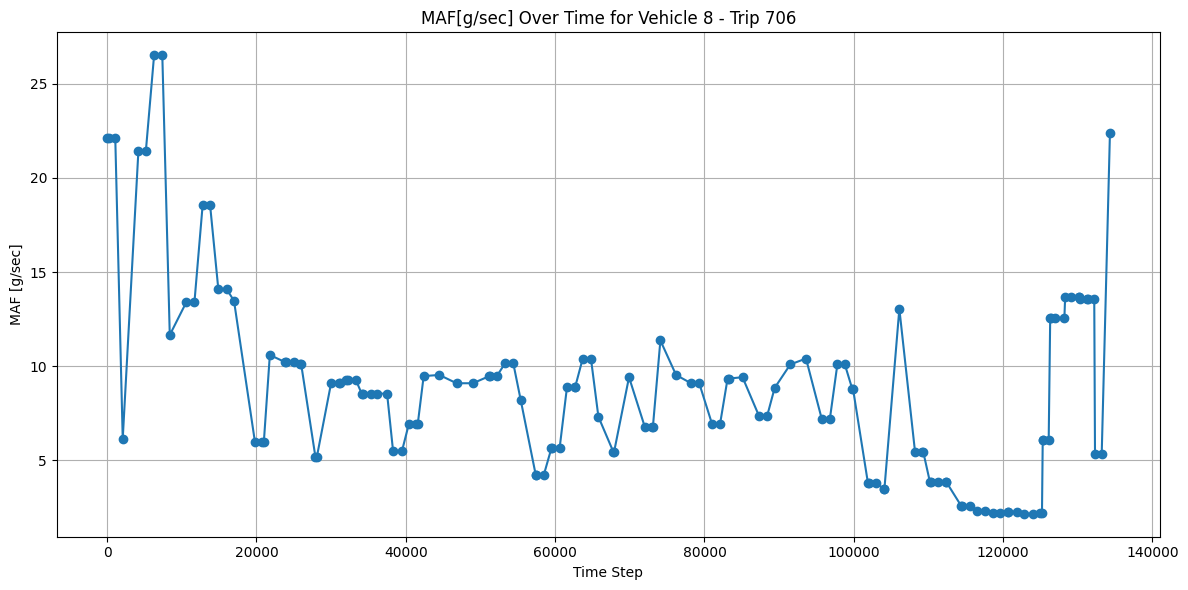

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- Input: Provide your specific vehicle ID and trip ID ----
vehicle_id = 8   # replace with your actual VehId
trip_id = 706      # replace with your actual Trip

# ---- Filter Data for Specific Trip ----
trip_data = df[(df['VehId'] == vehicle_id) & (df['Trip'] == trip_id)].copy()

# ---- Plot the Line Graph ----
plt.figure(figsize=(12, 6))
plt.plot(trip_data["Timestamp(ms)"], trip_data['MAF[g/sec]'], marker='o', linestyle='-')
plt.title(f"MAF[g/sec] Over Time for Vehicle {vehicle_id} - Trip {trip_id}")
plt.xlabel("Time Step" if time_col == 'Step' else "Timestamp")
plt.ylabel("MAF [g/sec]")
plt.grid(True)
plt.tight_layout()


#Save this plot as an image
plt.savefig(f"MAF_plot_Vehicle_{vehicle_id}_Trip_{trip_id}.png")
plt.show()

# Missing value relation

In [32]:
columns = [
    "Air Conditioning Power[kW]",
    "Air Conditioning Power[Watts]",
    "Heater Power[Watts]",
    "HV Battery Current[A]",            
    "HV Battery SOC[%]",                   
    "HV Battery Voltage[V]",              
    "Short Term Fuel Trim Bank 1[%]",      
    "Short Term Fuel Trim Bank 2[%]",      
    "Long Term Fuel Trim Bank 1[%]",       
    "Long Term Fuel Trim Bank 2[%]",       
    "Gradient",                              
    "Energy_Consumption",                             
    "Match Type",                           
    "Class of Speed Limit",            
]

df = df.drop(columns=columns)

<Axes: >

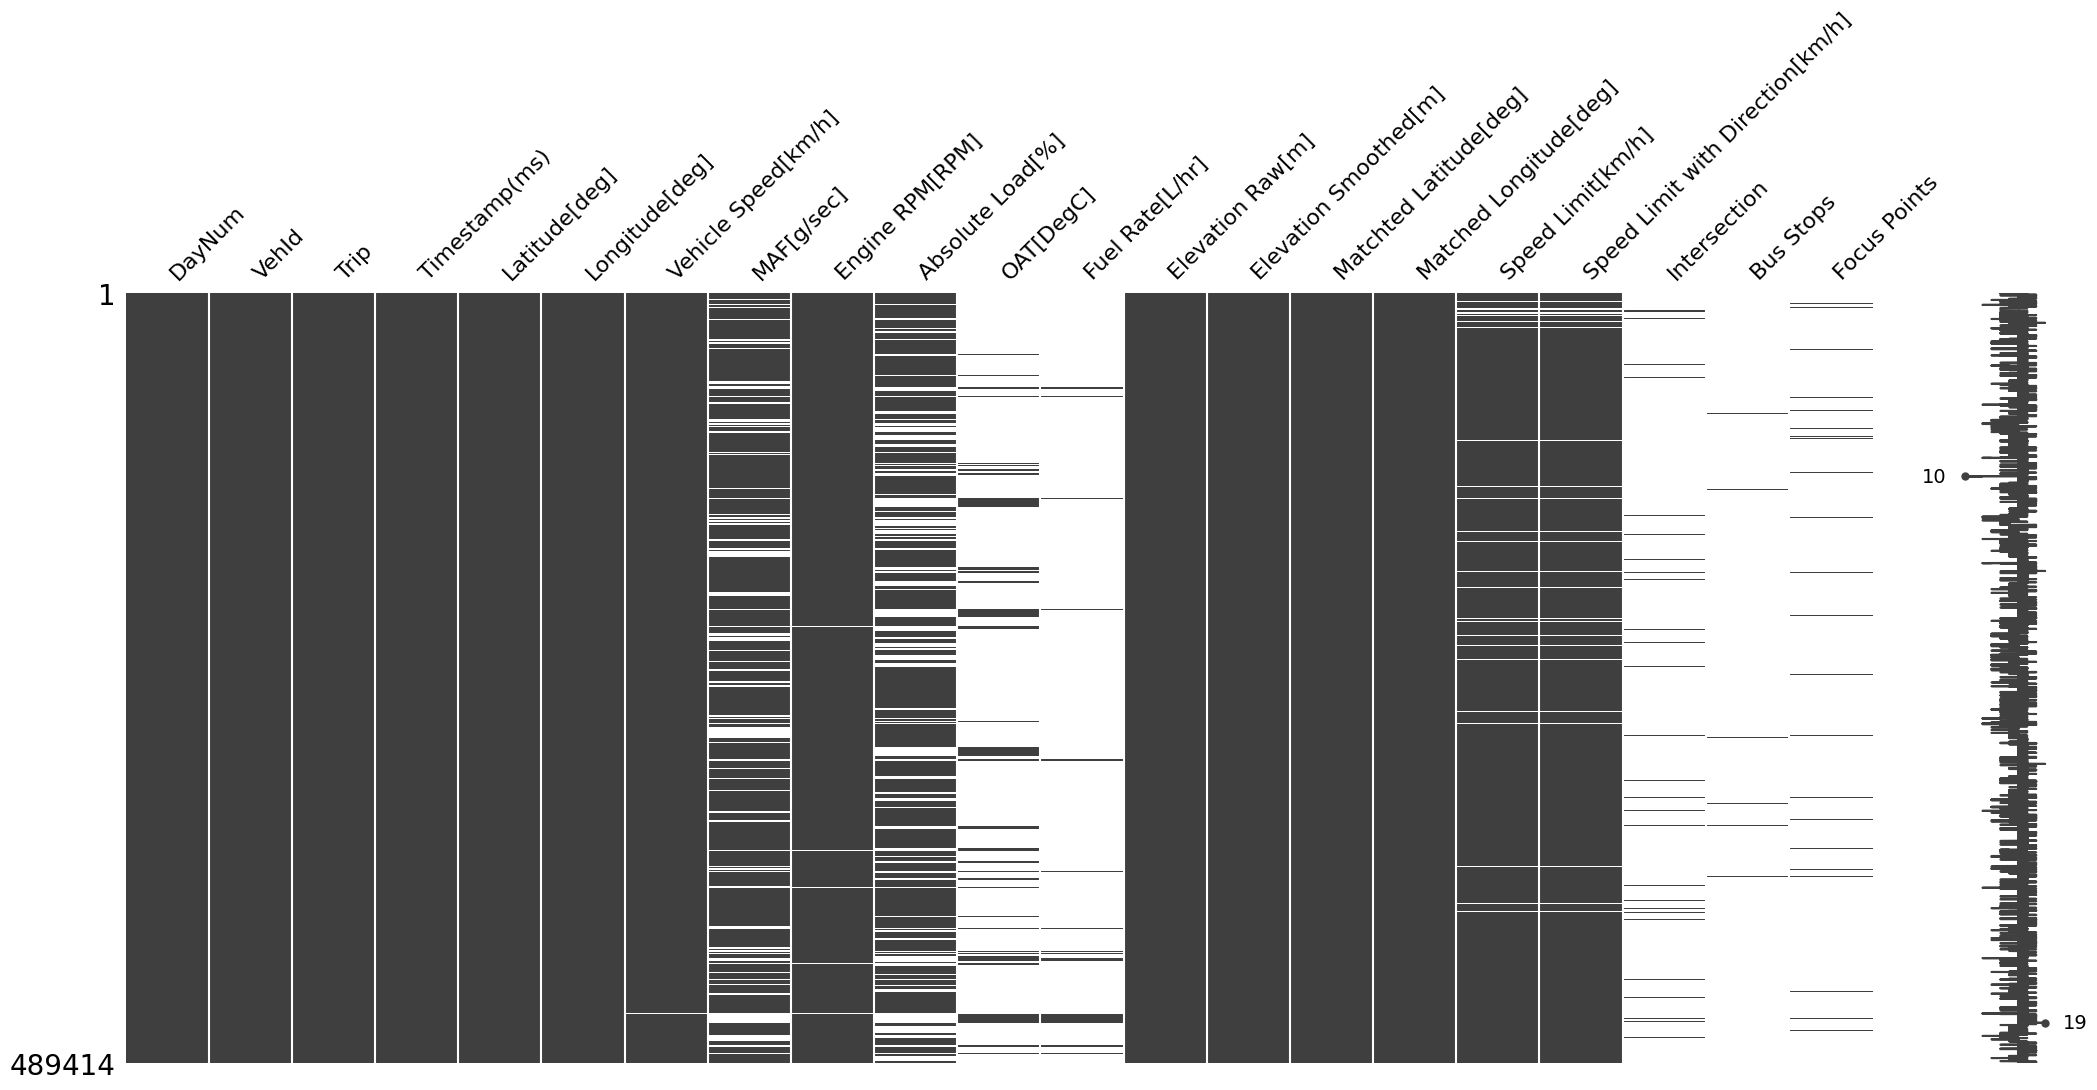

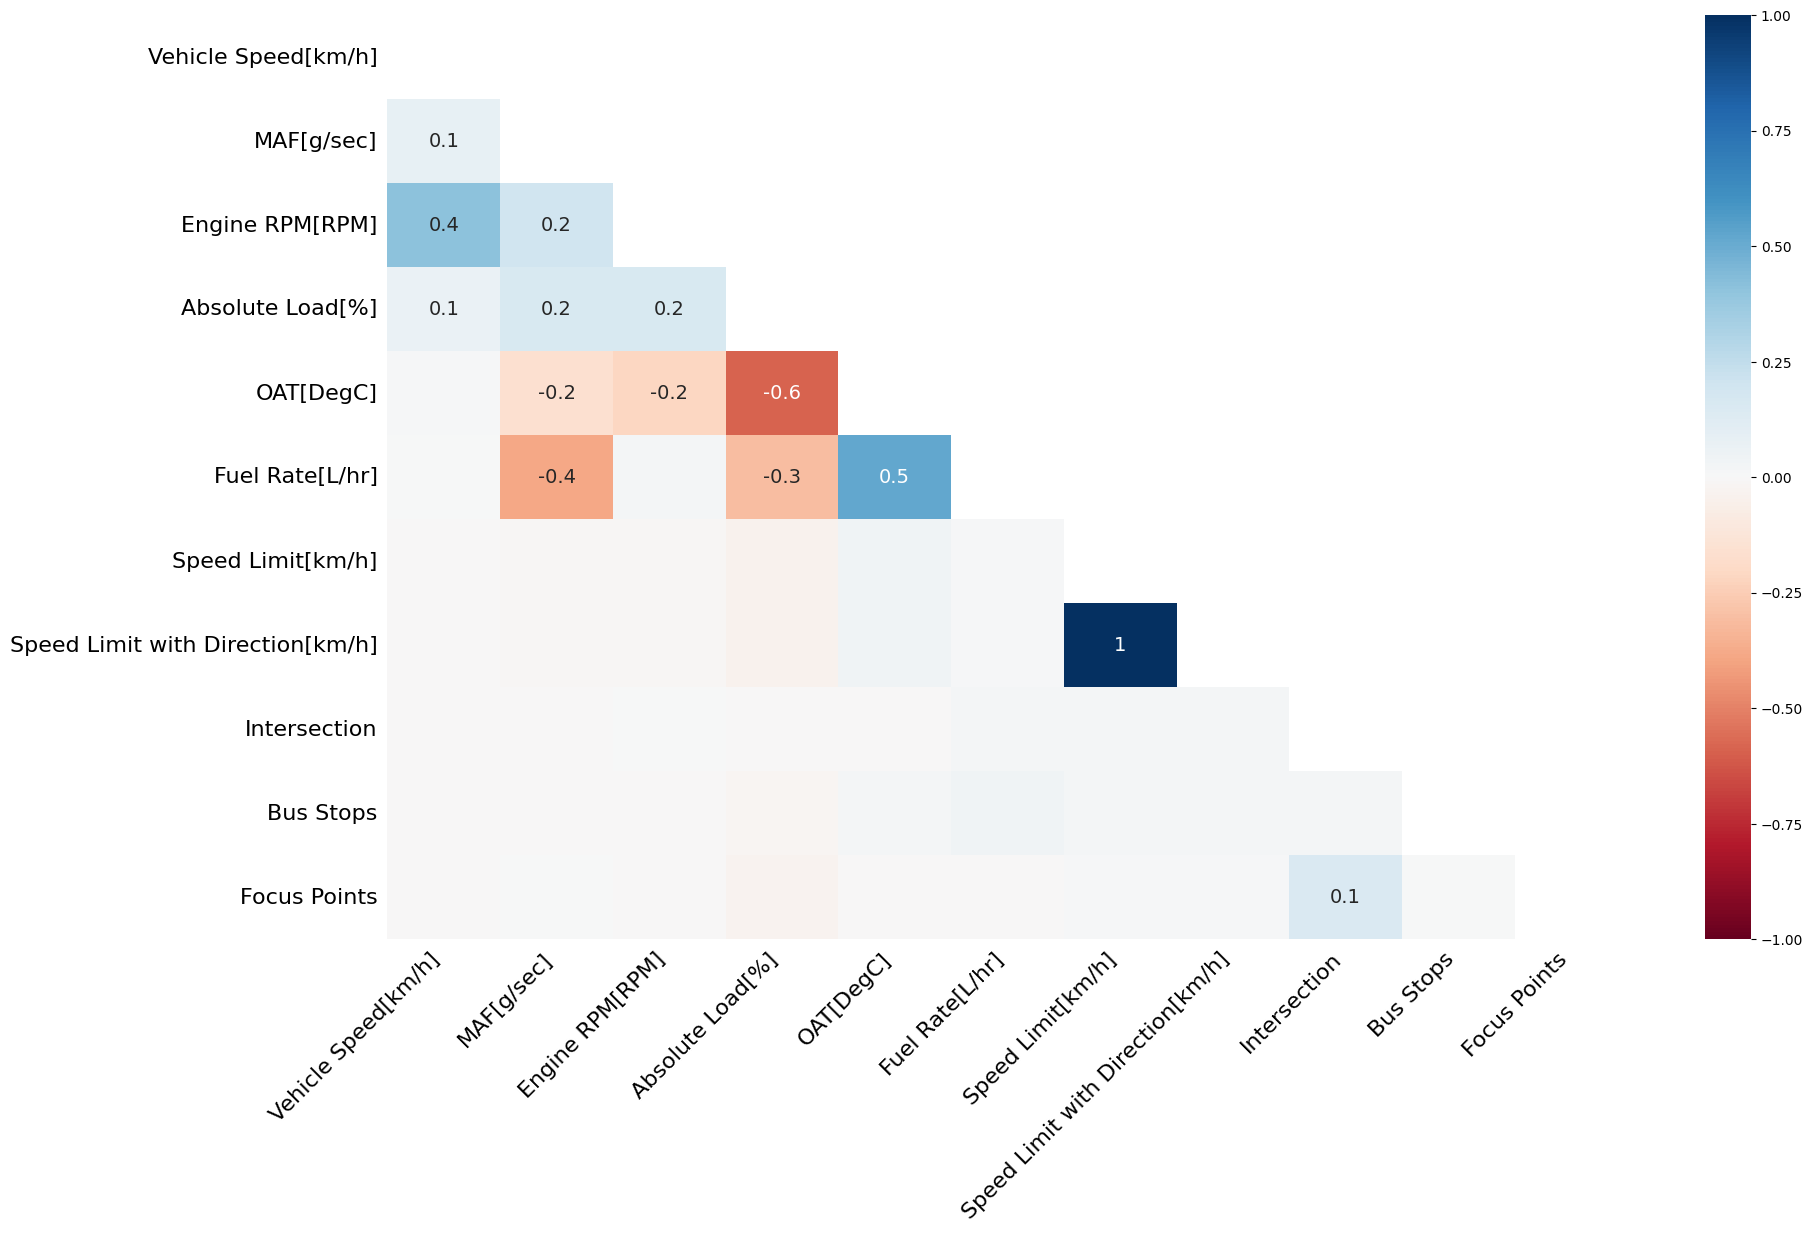

In [33]:

import missingno as msno

msno.matrix(df)
msno.heatmap(df)



# Garph relationship

In [5]:
df = pd.read_csv("veh.csv")
len(df)

32552

In [6]:
len(df.columns)

22

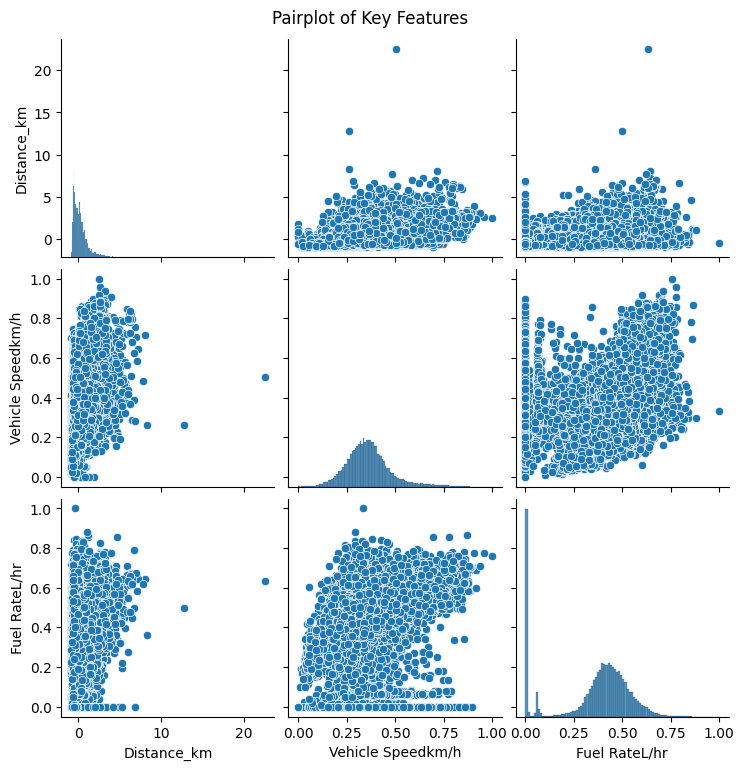

In [18]:
# Only select a few to avoid clutter
subset = df[['Distance_km', 'Vehicle Speedkm/h', 'Fuel RateL/hr']]
sns.pairplot(subset)
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()



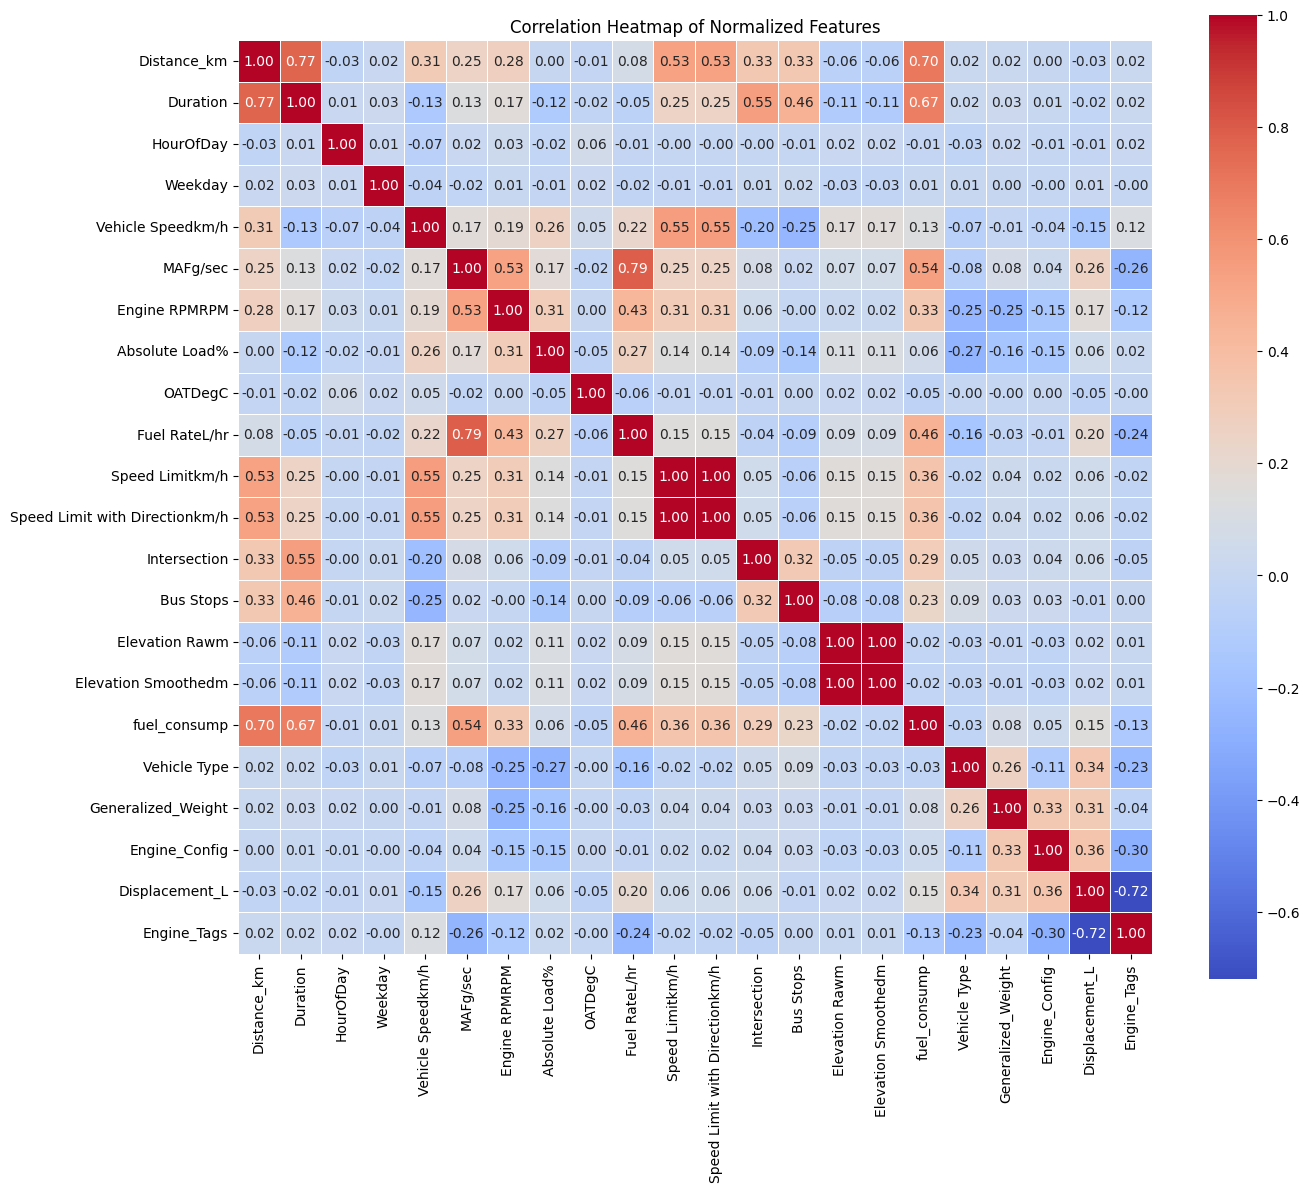

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(14, 12))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Normalized Features")
plt.tight_layout()
plt.show()
